<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [52]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np

In [53]:
#Importation de la librairie plotly express
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sb
import statsmodels.api as sm

In [54]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [55]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

C:\Users\nicol\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\nicol\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\nicol\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [56]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [57]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :", df_erp.shape[1])
#La nature des données dans chacune des colonnes
display(df_erp.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
for c in list(df_erp):
    print("\nColonne", c, "- Nombre de valeurs NaN :", ((df_erp[c]).isna()).sum())
    print("Colonne", c, "- Nombre de valeurs non-vides :", df_erp.shape[0] - ((df_erp[c]).isna()).sum())

Nombre de colonnes : 6


product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object


Colonne product_id - Nombre de valeurs NaN : 0
Colonne product_id - Nombre de valeurs non-vides : 825

Colonne onsale_web - Nombre de valeurs NaN : 0
Colonne onsale_web - Nombre de valeurs non-vides : 825

Colonne price - Nombre de valeurs NaN : 0
Colonne price - Nombre de valeurs non-vides : 825

Colonne stock_quantity - Nombre de valeurs NaN : 0
Colonne stock_quantity - Nombre de valeurs non-vides : 825

Colonne stock_status - Nombre de valeurs NaN : 0
Colonne stock_status - Nombre de valeurs non-vides : 825

Colonne purchase_price - Nombre de valeurs NaN : 0
Colonne purchase_price - Nombre de valeurs non-vides : 825


In [58]:
#Afficher les 5 premières lignes de la table
display(df_erp.head())

product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77

In [59]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
display((df_erp.groupby('product_id').count()).reset_index().sort_values('price',ascending=False))

product_id  onsale_web  price  stock_quantity  stock_status  \
0          3847           1      1               1             1   
554        5610           1      1               1             1   
544        5564           1      1               1             1   
545        5565           1      1               1             1   
546        5566           1      1               1             1   
..          ...         ...    ...             ...           ...   
278        4635           1      1               1             1   
279        4636           1      1               1             1   
280        4646           1      1               1             1   
281        4647           1      1               1             1   
824        7338           1      1               1             1   

     purchase_price  
0                 1  
554               1  
544               1  
545               1  
546               1  
..              ...  
278               1  
279               1  
280               1  
281               1  
824               1  

[825 rows x 6 columns]

Toutes les lignes ont bien un product_id unique

In [60]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
display((df_erp.groupby('stock_status').count()).reset_index().sort_values('price',ascending=False))

stock_status  product_id  onsale_web  price  stock_quantity  purchase_price
0      instock         733         733    733             733             733
1   outofstock          92          92     92              92              92

Il semble que la valeur de stock_status soit liée à la valeur de stock_quantity

In [61]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = (df_erp["stock_quantity"]).apply(lambda s_qt: "instock" if s_qt>0 else "outofstock")

In [62]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp['status_check'] = (df_erp["stock_status"] == df_erp["stock_status_2"])
display(df_erp)
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3   outofstock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price stock_status_2  status_check  
0             12.88        instock          True  
1             17.54        instock          True  
2             10.64     outofstock          True  
3              6.92        instock          True  
4             23.77        instock         False  
..              ...            ...           ...  
820           23.48        instock          True  
821           24.18        instock          True  
822           27.18        instock          True  
823           13.42        instock          True  
824            8.00        instock          True  

[825 rows x 8 columns]

In [63]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
display(df_erp.groupby('status_check').count())

product_id  onsale_web  price  stock_quantity  stock_status  \
status_check                                                                
False                  2           2      2               2             2   
True                 823         823    823             823           823   

              purchase_price  stock_status_2  
status_check                                  
False                      2               2  
True                     823             823

2 lignes à corriger

In [64]:
df_erp.loc[df_erp['status_check'] == False]

product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   

     purchase_price stock_status_2  status_check  
4             23.77        instock         False  
398            9.66     outofstock         False

In [65]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

In [66]:
(df_erp.loc[df_erp['status_check'] == False])["product_id"]

4      4039
398    4885
Name: product_id, dtype: int64

In [67]:
#Corriger la ou les données incohérentes

for p in (df_erp.loc[df_erp['status_check'] == False])["product_id"]:
    df_erp.loc[df_erp['product_id'] == p,"stock_status"] = df_erp.loc[df_erp['product_id'] == p,"stock_status_2"]
#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp['status_check'] = (df_erp["stock_status"] == df_erp["stock_status_2"])
display(df_erp)
display(df_erp.groupby('status_check').count())

product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price stock_status_2  status_check  
0             12.88        instock          True  
1             17.54        instock          True  
2             10.64     outofstock          True  
3              6.92        instock          True  
4             23.77        instock          True  
..              ...            ...           ...  
820           23.48        instock          True  
821           24.18        instock          True  
822           27.18        instock          True  
823           13.42        instock          True  
824            8.00        instock          True  

[825 rows x 8 columns]

product_id  onsale_web  price  stock_quantity  stock_status  \
status_check                                                                
True                 825         825    825             825           825   

              purchase_price  stock_status_2  
status_check                                  
True                     825             825

In [68]:
df_erp.drop(["stock_status_2","status_check"], axis=1, inplace=True)
display(df_erp)

product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price  
0             12.88  
1             17.54  
2             10.64  
3              6.92  
4             23.77  
..              ...  
820           23.48  
821           24.18  
822           27.18  
823           13.42  
824            8.00  

[825 rows x 6 columns]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [69]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombre d'articles avec un prix non renseigné : {}".format(df_erp['price'].isna().sum())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("Prix de l'article le moins cher : {}".format(df_erp['price'].min()),"€")
#Afficher le prix maximum de la colonne "price"
print("Prix de l'article le plus cher : {}".format(df_erp['price'].max()),"€")
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
display(df_erp.loc[df_erp['price']<0])

Nombre d'articles avec un prix non renseigné : 0
Prix de l'article le moins cher : -20.0 €
Prix de l'article le plus cher : 225.0 €


product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price  
151           10.33  
469            4.34  
739            4.61

In [70]:
#Il semble que des signes '-' aient été malencontreusement ajoutés
#On va simplement multiplier les valeurs en question par -1
df_erp['price'] = df_erp['price'].apply(lambda p: (-1)*p if p<0 else p)
display(df_erp.iloc[[151,469,739],:])

print("Prix de l'article le moins cher : {}".format(df_erp['price'].min()),"€")

product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0   20.0               0   outofstock   
469        5017           0    8.0               0   outofstock   
739        6594           0    9.1              19      instock   

     purchase_price  
151           10.33  
469            4.34  
739            4.61

Prix de l'article le moins cher : 5.2 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [71]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
print("Nombre d'articles dont la quantité en stock n'est pas renseignée : {}".format(df_erp['stock_quantity'].isna().sum()))

#Afficher la quantité minimum de la colonne "stock_quantity"
print("Minimum colonne Stock : {}".format(df_erp['stock_quantity'].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("Maximum colonne Stock : {}".format(df_erp['stock_quantity'].max()))
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
display(df_erp.loc[df_erp['stock_quantity']<0])

Nombre d'articles dont la quantité en stock n'est pas renseignée : 0
Minimum colonne Stock : -10
Maximum colonne Stock : 145


product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price  
449            4.96  
573           22.30

Des valeurs négatives de stock sont délicates à gérer sans données supplémentaires.<br>
Dans l'absolu, il faudrait rassembler toutes les opérations (achats/ventes) associées à ces 2 produits depuis la précédente extraction de l'ERP.<br>
Le plus probable est que des réceptions de ces 2 marchandises n'ont pas été enregistrées dans l'ERP. Il faut être tout aussi rigoureux dans le suivi de la réception (achat) des marchandises que pour le suivi de l'envoi (vente) des marchandises.<br>
Personnellement, je pense qu'il faut conserver ces valeurs de stock négatives pour indiquer que des achats de ces produits auprès des fournisseurs sont en cours (ou n'ont pas été enregistrées), et ainsi avoir la vision la plus fidèle possible de la valorisation de notre stock.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [72]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print("Nombre d'articles dont la disponbilité via notre site n'est pas renseignée : {}".format(df_erp['onsale_web'].isna().sum()))
display(df_erp.groupby('onsale_web').count())

Nombre d'articles dont la disponbilité via notre site n'est pas renseignée : 0


product_id  price  stock_quantity  stock_status  purchase_price
onsale_web                                                                 
0                  109    109             109           109             109
1                  716    716             716           716             716

- 0 = False : le produit n'est pas disponible à la vente via notre site web ;
- 1 = True : le produit est disponible à la vente via notre site web.

**Quelles sont les colonnes à conserver selon vous ?**<br>
Si on veut croiser les données du fichier *erp.xlsx* avec celles du fichier *web.xlsx*, on ne peut le faire que sur les produits disponibles à la vente via notre site web, donc on va filtrer sur les lignes ayant la valeur onsale_web = 1.<br>
Pas de raison particulière d'ignorer n'importe laquelle des colonnes de ce DataFrame.<br>
Des produits peuvent être vendus autrement que par le site web.

In [73]:
df_erp_fweb = df_erp.loc[df_erp['onsale_web'] == 1]
display(df_erp_fweb)

product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
787        6930           1    8.4              28      instock   
792        7023           1   27.5              23      instock   
793        7025           1   69.0               8      instock   
822        7247           1   54.8               6      instock   
824        7338           1   16.3              40      instock   

     purchase_price  
0             12.88  
1             17.54  
2             10.64  
3              6.92  
4             23.77  
..              ...  
787            4.34  
792           14.21  
793           34.22  
822           27.18  
824            8.00  

[716 rows x 6 columns]

In [74]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
# DÉJÀ FAIT à la fin du paragraphe 2.1

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [75]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
print("Nombre d'articles avec un prix d'achat non renseigné : {}".format(df_erp['purchase_price'].isna().sum()))
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"

#Afficher le prix minimum de la colonne "purchase_price"
print("Prix d'achat de l'article le moins cher : {}".format(df_erp['purchase_price'].min()),"€")
#Afficher le prix maximum de la colonne "purchase_price"
print("Prix d'achat de l'article le plus cher : {}".format(df_erp['purchase_price'].max()),"€")

Nombre d'articles avec un prix d'achat non renseigné : 0
Prix d'achat de l'article le moins cher : 2.74 €
Prix d'achat de l'article le plus cher : 137.81 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [76]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [77]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :", df_web.shape[1])
#La nature des données dans chacune des colonnes
display(df_web.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
for c in list(df_web):
    print("\nColonne", c, "- Nombre de valeurs NaN :", ((df_web[c]).isna()).sum())
    print("Colonne", c, "- Nombre de valeurs non-vides :", df_web.shape[0] - ((df_web[c]).isna()).sum())

Nombre de colonnes : 29


sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object



Colonne sku - Nombre de valeurs NaN : 85
Colonne sku - Nombre de valeurs non-vides : 1428

Colonne virtual - Nombre de valeurs NaN : 0
Colonne virtual - Nombre de valeurs non-vides : 1513

Colonne downloadable - Nombre de valeurs NaN : 0
Colonne downloadable - Nombre de valeurs non-vides : 1513

Colonne rating_count - Nombre de valeurs NaN : 0
Colonne rating_count - Nombre de valeurs non-vides : 1513

Colonne average_rating - Nombre de valeurs NaN : 83
Colonne average_rating - Nombre de valeurs non-vides : 1430

Colonne total_sales - Nombre de valeurs NaN : 83
Colonne total_sales - Nombre de valeurs non-vides : 1430

Colonne tax_status - Nombre de valeurs NaN : 797
Colonne tax_status - Nombre de valeurs non-vides : 716

Colonne tax_class - Nombre de valeurs NaN : 1513
Colonne tax_class - Nombre de valeurs non-vides : 0

Colonne post_author - Nombre de valeurs NaN : 83
Colonne post_author - Nombre de valeurs non-vides : 1430

Colonne post_date - Nombre de valeurs NaN : 83
Colonne post_

**Selon vous, quelles sont les colonnes à conserver ?**

Conserver les colonnes *sku*, *total_sales*, *guid*, *tax_status*, *product*, *post_title*, *post_type* (pour ne conserver que les lignes avec la valeur product).

In [78]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(["virtual","downloadable","rating_count","average_rating","tax_class",
             "post_author","post_date","post_date_gmt","post_content","post_excerpt",
             "post_status","comment_status","ping_status","post_password","post_name",
             "post_modified","post_modified_gmt","post_content_filtered","post_parent",
             "menu_order","post_mime_type","comment_count"], axis=1, inplace=True)
display(df_web)

sku  total_sales tax_status product_type  \
0     11862          3.0        NaN          Vin   
1     16057          5.0        NaN          Vin   
2     14692          5.0    taxable          Vin   
3     16295         14.0        NaN          Vin   
4     15328          2.0    taxable          Vin   
...     ...          ...        ...          ...   
1508  16326          5.0    taxable          Vin   
1509  15662         15.0    taxable          Vin   
1510  15329          3.0        NaN          Vin   
1511  14827          7.0        NaN          Vin   
1512  16004          5.0        NaN          Vin   

                                             post_title  \
0                     Gilles Robin Hermitage Rouge 2012   
1     Domaine Pellé Sancerre Rouge La Croix Au Garde...   
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016   
3     Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   
4                  Agnès Levet Côte Rôtie Maestria 2017   
...                                                 ...   
1508    Camin Larredya Jurançon Moelleux Au Capcéu 2018   
1509  Chermette Domaine du Vissoux Beaujolais Griott...   
1510               Agnès Levet Côte Rôtie Péroline 2017   
1511  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
1512                    Château du Couvent Pomerol 2017   

                                                   guid   post_type  
0     https://www.bottle-neck.fr/wp-content/uploads/...  attachment  
1     https://www.bottle-neck.fr/wp-content/uploads/...  attachment  
2     https://www.bottle-neck.fr/?post_type=product&...     product  
3     https://www.bottle-neck.fr/wp-content/uploads/...  attachment  
4     https://www.bottle-neck.fr/?post_type=product&...     product  
...                                                 ...         ...  
1508  https://www.bottle-neck.fr/?post_type=product&...     product  
1509  https://www.bottle-neck.fr/?post_type=product&...     product  
1510  https://www.bottle-neck.fr/wp-content/uploads/...  attachment  
1511  https://www.bottle-neck.fr/wp-content/uploads/...  attachment  
1512  https://www.bottle-neck.fr/wp-content/uploads/...  attachment  

[1513 rows x 7 columns]

On ne conservera que les lignes qui ont une valeur de *post_type* égale à "product".<br>
Les lignes pour lesquelles on a *post_type* = *"attachment"* indiquent juste qu'une image du produit est affichée sur le site.

In [79]:
display(df_web.groupby('post_type').count())

sku  total_sales  tax_status  product_type  post_title  guid
post_type                                                               
attachment  714          714           0           714         714   714
product     714          716         716           715         716   716

Attention, les NaN (qui ont le type float) sont ignorés par la fonction *count* : il y a donc 2 lignes correspondantes à des produits sans *sku* mais pour lesquelles des champs sont renseignés.<br>
Les lignes pour lesquelles *post_type* prend la valeur *"attachment"* peuvent être supprimées.<br>
En effet, chaque ligne du fichier *web.xlsx* correspond à une entrée sur le site web, pas nécessairement à un produit physique, la colonne *sku* n'est pas une clé primaire à elle seule. Il semble en revanche que les colonnes *sku* et *post_title* forment une clé primaire si on supprime les lignes pour lesquelles le champ *sku* est manquant.

In [80]:
#Visualisation des valeurs de la colonne sku
df_web['sku_type'] = (df_web['sku']).apply(lambda s: str(type(s)))
display(df_web)
display(df_web.groupby('sku_type').count())

sku  total_sales tax_status product_type  \
0     11862          3.0        NaN          Vin   
1     16057          5.0        NaN          Vin   
2     14692          5.0    taxable          Vin   
3     16295         14.0        NaN          Vin   
4     15328          2.0    taxable          Vin   
...     ...          ...        ...          ...   
1508  16326          5.0    taxable          Vin   
1509  15662         15.0    taxable          Vin   
1510  15329          3.0        NaN          Vin   
1511  14827          7.0        NaN          Vin   
1512  16004          5.0        NaN          Vin   

                                             post_title  \
0                     Gilles Robin Hermitage Rouge 2012   
1     Domaine Pellé Sancerre Rouge La Croix Au Garde...   
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016   
3     Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   
4                  Agnès Levet Côte Rôtie Maestria 2017   
...                                                 ...   
1508    Camin Larredya Jurançon Moelleux Au Capcéu 2018   
1509  Chermette Domaine du Vissoux Beaujolais Griott...   
1510               Agnès Levet Côte Rôtie Péroline 2017   
1511  Marc Colin Et Fils Chassagne-Montrachet Blanc ...   
1512                    Château du Couvent Pomerol 2017   

                                                   guid   post_type  \
0     https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
1     https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
2     https://www.bottle-neck.fr/?post_type=product&...     product   
3     https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
4     https://www.bottle-neck.fr/?post_type=product&...     product   
...                                                 ...         ...   
1508  https://www.bottle-neck.fr/?post_type=product&...     product   
1509  https://www.bottle-neck.fr/?post_type=product&...     product   
1510  https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
1511  https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
1512  https://www.bottle-neck.fr/wp-content/uploads/...  attachment   

           sku_type  
0     <class 'int'>  
1     <class 'int'>  
2     <class 'int'>  
3     <class 'int'>  
4     <class 'int'>  
...             ...  
1508  <class 'int'>  
1509  <class 'int'>  
1510  <class 'int'>  
1511  <class 'int'>  
1512  <class 'int'>  

[1513 rows x 8 columns]

sku  total_sales  tax_status  product_type  post_title  \
sku_type                                                                   
<class 'float'>     0            2           2             2           2   
<class 'int'>    1424         1424         712          1424        1424   
<class 'str'>       4            4           2             3           4   

                 guid  post_type  
sku_type                          
<class 'float'>     2          2  
<class 'int'>    1424       1424  
<class 'str'>       4          4

In [81]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les.
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification ?
display(df_web.loc[df_web['sku_type'] == "<class 'str'>"])

sku  total_sales tax_status product_type  \
272               13127-1          4.0    taxable          Vin   
842   bon-cadeau-25-euros          7.0        NaN        Autre   
1117              13127-1          4.0        NaN          Vin   
1387  bon-cadeau-25-euros          7.0    taxable          NaN   

                                        post_title  \
272   Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
842                              Bon cadeau de 25€   
1117  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1387                             Bon cadeau de 25€   

                                                   guid   post_type  \
272   https://www.bottle-neck.fr/?post_type=product&...     product   
842   https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
1117  https://www.bottle-neck.fr/wp-content/uploads/...  attachment   
1387  https://www.bottle-neck.fr/?post_type=product&...     product   

           sku_type  
272   <class 'str'>  
842   <class 'str'>  
1117  <class 'str'>  
1387  <class 'str'>

In [82]:
#Identifier les lignes sans code articles
display(df_web.loc[(df_web['sku_type'] == "<class 'float'>")])
display(df_web.loc[(df_web['sku_type'] == "<class 'float'>") & (df_web['post_type'] == "product")])

sku  total_sales tax_status product_type post_title guid post_type  \
8     NaN          NaN        NaN          NaN        NaN  NaN       NaN   
20    NaN          NaN        NaN          NaN        NaN  NaN       NaN   
30    NaN          NaN        NaN          NaN        NaN  NaN       NaN   
37    NaN          NaN        NaN          NaN        NaN  NaN       NaN   
41    NaN          NaN        NaN          NaN        NaN  NaN       NaN   
...   ...          ...        ...          ...        ...  ...       ...   
1384  NaN          NaN        NaN          NaN        NaN  NaN       NaN   
1429  NaN          NaN        NaN          NaN        NaN  NaN       NaN   
1432  NaN          NaN        NaN          NaN        NaN  NaN       NaN   
1445  NaN          NaN        NaN          NaN        NaN  NaN       NaN   
1457  NaN          NaN        NaN          NaN        NaN  NaN       NaN   

             sku_type  
8     <class 'float'>  
20    <class 'float'>  
30    <class 'float'>  
37    <class 'float'>  
41    <class 'float'>  
...               ...  
1384  <class 'float'>  
1429  <class 'float'>  
1432  <class 'float'>  
1445  <class 'float'>  
1457  <class 'float'>  

[85 rows x 8 columns]

sku  total_sales tax_status product_type  \
1084  NaN        -56.0    taxable          Vin   
1087  NaN        -17.0    taxable          Vin   

                                           post_title  \
1084  Pierre Jean Villa Condrieu Jardin Suspendu 2018   
1087       Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                                   guid post_type  \
1084  https://www.bottle-neck.fr/?post_type=product&...   product   
1087  https://www.bottle-neck.fr/?post_type=product&...   product   

             sku_type  
1084  <class 'float'>  
1087  <class 'float'>

In [83]:
df_web_tmp = (df_web.loc[(df_web['sku_type'] == "<class 'float'>") & (df_web['post_type'] == "product")]).copy()
#La colonne guid fait référence à l'id_product à partir du 54e caractère
df_web_tmp['guid'] = df_web_tmp['guid'].apply(lambda g: int(g[53:]))
display(df_web_tmp)

sku  total_sales tax_status product_type  \
1084  NaN        -56.0    taxable          Vin   
1087  NaN        -17.0    taxable          Vin   

                                           post_title  guid post_type  \
1084  Pierre Jean Villa Condrieu Jardin Suspendu 2018  5075   product   
1087       Pierre Jean Villa Côte Rôtie Fongeant 2017  5070   product   

             sku_type  
1084  <class 'float'>  
1087  <class 'float'>

**Pour les codes articles identifiés, réaliser une analyse et définissez l'action à entreprendre**<br>

In [84]:
display(df_erp.merge(df_web_tmp['guid'],how='inner',left_on='product_id',right_on='guid'))
display(df_liaison.merge(df_web_tmp['guid'],how='inner',left_on='product_id',right_on='guid'))

product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        5070           1   84.7               0   outofstock           47.43   
1        5075           1   43.3               0   outofstock           21.70   

   guid  
0  5070  
1  5075

id_web  product_id  guid
0    NaN        5070  5070
1    NaN        5075  5075

Ces 2 lignes sont problématiques car elles ont un nombre de vente (en quantités) négatif d'après les données web.<br>
De plus après enquête, en revenant aux données initiales, ces 2 lignes font référence à 2 produits qui existent dans l'ERP, qui ont un product_id respectivement égal à 5075 et 5070 (grâce à la colonne *guid*), et qui apparaissent bien comme étant disponibles pour la vente en ligne.<br>
Toutefois, dans la table de liaison entre product_id et sku site, il n'y a pas de correspondance sku (id_web) pour ces 2 product_id.<br>
Afin de clarifier la situation liée à ces 2 produits, il faudrait dans l'absolu rassembler les documents/données de commandes réalisées via le site pour chacun de ces produits, de façon à obtenir les nombres de ventes exacts.<br>
Quant au futur bon fonctionnement du site, il faudrait affecter un sku unique (parmi les numéros disponibles) à chacun de ces produits et mettre à jour le site et la table de liaison avec ces données.<br>
Pour la suite de l'exercice, et en l'absence de données supplémentaires, nous allons ignorer ces lignes pour notre analyse.

**La clé pour chaque ligne est-elle uniques ? ou autrement dit, y a-t-il des doublons ?**<br>
Comme dit plus haut, le sku seul ne constitue pas une clé primaire de la table.

In [85]:
display((df_web.groupby('sku').count()).sort_values('sku_type', ascending=False))

total_sales  tax_status  product_type  post_title  guid  \
sku                                                                            
38                             2           1             2           2     2   
15779                          2           1             2           2     2   
15741                          2           1             2           2     2   
15745                          2           1             2           2     2   
15746                          2           1             2           2     2   
...                          ...         ...           ...         ...   ...   
14865                          2           1             2           2     2   
14897                          2           1             2           2     2   
14899                          2           1             2           2     2   
14905                          2           1             2           2     2   
bon-cadeau-25-euros            2           1             1           2     2   

                     post_type  sku_type  
sku                                       
38                           2         2  
15779                        2         2  
15741                        2         2  
15745                        2         2  
15746                        2         2  
...                        ...       ...  
14865                        2         2  
14897                        2         2  
14899                        2         2  
14905                        2         2  
bon-cadeau-25-euros          2         2  

[714 rows x 7 columns]

Les *sku* apparaissent à 2 reprises car il apparaît une première fois pour *post_type = 'product'* et une seconde fois pour *post_type = 'attachment'* (visuel commercial).

In [86]:
# on filtre le dataframe pour ne garder que les lignes pour lesquelles post_type = 'product'
df_web = df_web.loc[df_web['post_type']=="product"]
display((df_web.groupby('sku').count()).sort_values('sku_type',ascending=False))

total_sales  tax_status  product_type  post_title  guid  \
sku                                                                            
38                             1           1             1           1     1   
15779                          1           1             1           1     1   
15741                          1           1             1           1     1   
15745                          1           1             1           1     1   
15746                          1           1             1           1     1   
...                          ...         ...           ...         ...   ...   
14865                          1           1             1           1     1   
14897                          1           1             1           1     1   
14899                          1           1             1           1     1   
14905                          1           1             1           1     1   
bon-cadeau-25-euros            1           1             0           1     1   

                     post_type  sku_type  
sku                                       
38                           1         1  
15779                        1         1  
15741                        1         1  
15745                        1         1  
15746                        1         1  
...                        ...       ...  
14865                        1         1  
14897                        1         1  
14899                        1         1  
14905                        1         1  
bon-cadeau-25-euros          1         1  

[714 rows x 7 columns]

In [87]:
#Les lignes sans code article semblent être toutes non renseignés
#Remarque : presque toutes ces lignes ont été éliminées en appliquant un filtre sur la valeur de la colonne 'post_type'
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web_check = df_web.loc[df_web['sku_type'] == "<class 'float'>"]
display(df_web_check)
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
display(df_web_check.info())

sku  total_sales tax_status product_type  \
1084  NaN        -56.0    taxable          Vin   
1087  NaN        -17.0    taxable          Vin   

                                           post_title  \
1084  Pierre Jean Villa Condrieu Jardin Suspendu 2018   
1087       Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                                   guid post_type  \
1084  https://www.bottle-neck.fr/?post_type=product&...   product   
1087  https://www.bottle-neck.fr/?post_type=product&...   product   

             sku_type  
1084  <class 'float'>  
1087  <class 'float'>

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1084 to 1087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   tax_status    2 non-null      object 
 3   product_type  2 non-null      object 
 4   post_title    2 non-null      object 
 5   guid          2 non-null      object 
 6   post_type     2 non-null      object 
 7   sku_type      2 non-null      object 
dtypes: float64(1), object(7)
memory usage: 144.0+ bytes


None

**Que constatez-vous ?**<br>
On ne retrouve que les lignes 1084 et 1087 qui nous posaient problème.<br>
Comme dit plus haut, il nous faudrait des informations supplémentaires pour traiter (corriger) correctement ces 2 lignes.<br>
Comme on ne peut pas le faire ici faute de ces informations, on va simplement ignorer ces lignes en les filtrant.

In [88]:
df_web = df_web.loc[df_web['sku_type'] != "<class 'float'>"]
display(df_web.groupby('tax_status').count())

sku  total_sales  product_type  post_title  guid  post_type  \
tax_status                                                                
taxable     714          714           713         714   714        714   

            sku_type  
tax_status            
taxable          714

In [89]:
# La seule entrée avec un sku non-vide qui n'a pas de product_type est le bon cadeau de 25 euros
df_web.loc[df_web['sku'] == "bon-cadeau-25-euros","product_type"] = "Autre"
display(df_web.groupby('tax_status').count())
# On peut supprimer la colonne tax_status
df_web.drop(['tax_status','post_type','sku_type'], axis=1, inplace=True)

sku  total_sales  product_type  post_title  guid  post_type  \
tax_status                                                                
taxable     714          714           714         714   714        714   

            sku_type  
tax_status            
taxable          714

Remarque : le fichier *liaison.xlsx* est superflu car on pouvait déjà retrouver le product_id dans la colonne *guid*

In [90]:
df_web['guid'] = df_web['guid'].apply(lambda g: int(g[53:]))
df_web.rename(columns={"guid": "id_product"},inplace=True)
display(df_web)

sku  total_sales product_type  \
2     14692          5.0          Vin   
4     15328          2.0          Vin   
6     16515         10.0          Vin   
11    16585         15.0          Vin   
14    12869          7.0          Vin   
...     ...          ...          ...   
1503  13074          4.0          Vin   
1505  16322          0.0          Vin   
1507  12365         10.0          Vin   
1508  16326          5.0          Vin   
1509  15662         15.0          Vin   

                                             post_title  id_product  
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016        5794  
4                  Agnès Levet Côte Rôtie Maestria 2017        5827  
6     Château Turcaud Bordeaux Rouge Cuvée Majeure 2018        4964  
11              Xavier Frissant Touraine Sauvignon 2019        4223  
14                     Stéphane Tissot Arbois D.D. 2016        5900  
...                                                 ...         ...  
1503  Château de Vaudieu Châteauneuf-du-Pape L'Avenu...        4073  
1505  Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...        4198  
1507                   Parés Baltà Penedès Electio 2013        5630  
1508    Camin Larredya Jurançon Moelleux Au Capcéu 2018        5962  
1509  Chermette Domaine du Vissoux Beaujolais Griott...        4261  

[714 rows x 5 columns]

In [91]:
df_test = df_liaison.merge(df_web,how='inner',left_on='id_web',right_on='sku')
df_test['check_id'] = (df_test['product_id'] == df_test['id_product'])
display(df_test.groupby('check_id').count())

id_web  product_id  sku  total_sales  product_type  post_title  \
check_id                                                                   
True         714         714  714          714           714         714   

          id_product  
check_id              
True             714

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [92]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [93]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :", df_liaison.shape[1])
#La nature des données dans chacune des colonnes
display(df_liaison.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
for c in list(df_liaison):
    print("\nColonne", c, "- Nombre de valeurs NaN :", ((df_liaison[c]).isna()).sum())
    print("Colonne", c, "- Nombre de valeurs non-vides :", df_liaison.shape[0] - ((df_liaison[c]).isna()).sum())

Nombre de colonnes : 2


id_web        object
product_id     int64
dtype: object


Colonne id_web - Nombre de valeurs NaN : 91
Colonne id_web - Nombre de valeurs non-vides : 734

Colonne product_id - Nombre de valeurs NaN : 0
Colonne product_id - Nombre de valeurs non-vides : 825


In [94]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
display((df_liaison.groupby('product_id').count()).sort_values('id_web',ascending=False))

id_web
product_id        
3847             1
5484             1
5446             1
5448             1
5465             1
...            ...
4055             0
5017             0
4659             0
4744             0
4973             0

[825 rows x 1 columns]

In [95]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
display((df_liaison.groupby('id_web').count()).sort_values('product_id',ascending=False))

product_id
id_web                         
38                            1
15732                         1
15734                         1
15735                         1
15736                         1
...                         ...
14844                         1
14845                         1
14855                         1
14856                         1
bon-cadeau-25-euros           1

[734 rows x 1 columns]

In [96]:
#Avons-nous des articles sans correspondances?
display(df_liaison.loc[df_liaison['id_web'].isnull()])

id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[91 rows x 2 columns]

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointure des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jointure du fichier df_erp et df_liaison</h3>
</div>

In [97]:
#Fusion des fichiers df_erp et df_liaison
df_merge = df_liaison.merge(df_erp,how='outer',left_on='product_id',right_on='product_id')
display(df_merge)

id_web  product_id  onsale_web  price  stock_quantity stock_status  \
0      15298        3847           1   24.2              16      instock   
1      15296        3849           1   34.3              10      instock   
2      15300        3850           1   20.8               0   outofstock   
3      19814        4032           1   14.1              26      instock   
4      19815        4039           1   46.0               3      instock   
..       ...         ...         ...    ...             ...          ...   
820      NaN        7203           0   45.0              30      instock   
821      NaN        7204           0   45.0               9      instock   
822  13127-1        7247           1   54.8               6      instock   
823  14680-1        7329           0   26.5              14      instock   
824    16230        7338           1   16.3              40      instock   

     purchase_price  
0             12.88  
1             17.54  
2             10.64  
3              6.92  
4             23.77  
..              ...  
820           23.48  
821           24.18  
822           27.18  
823           13.42  
824            8.00  

[825 rows x 7 columns]

In [98]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
display(df_merge.loc[df_merge['product_id'].isnull()])

Empty DataFrame
Columns: [id_web, product_id, onsale_web, price, stock_quantity, stock_status, purchase_price]
Index: []

La fusion des 2 tables s'est faite facilement : on retrouve bien les 825 id_product du fichier *erp.xlsx*, et signe que toutes les lignes ont trouvé leur correspondance, la fonction merge (malgré une jointure externe) n'a pas ajouté de colonne product_id_suffixe

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [99]:
#Fusionnez les datasets df_merge et df_web
df_data = df_merge.merge(df_web,how='outer',left_on='id_web',right_on='sku')
display(df_data)

id_web  product_id  onsale_web  price  stock_quantity stock_status  \
0       38        4729           1    8.6              26      instock   
1       41        4634           1   41.0              11      instock   
2      304        4141           1   39.0             123      instock   
3      523        5932           1   59.9              13      instock   
4      531        5047           1   22.5              76      instock   
..     ...         ...         ...    ...             ...          ...   
820    NaN        7196           0   31.0              55      instock   
821    NaN        7200           0   31.0               6      instock   
822    NaN        7201           0   31.0              18      instock   
823    NaN        7203           0   45.0              30      instock   
824    NaN        7204           0   45.0               9      instock   

     purchase_price  sku  total_sales product_type  \
0              4.22   38         10.0          Vin   
1             20.12   41          6.0          Vin   
2             24.86  304          8.0    Champagne   
3             27.18  523          0.0       Cognac   
4             13.78  531          8.0    Champagne   
..              ...  ...          ...          ...   
820           31.20  NaN          NaN          NaN   
821           15.54  NaN          NaN          NaN   
822           16.02  NaN          NaN          NaN   
823           23.48  NaN          NaN          NaN   
824           24.18  NaN          NaN          NaN   

                                            post_title  id_product  
0           Emile Boeckel Crémant Brut Blanc de Blancs      4729.0  
1    Marcel Windholtz Eau de Vie de Marc de Gewurzt...      4634.0  
2                      Champagne Gosset Grande Réserve      4141.0  
3                         Cognac Normandin Mercier VFC      5932.0  
4    Champagne Petit Lebrun &amp; Fils Blanc de Bla...      5047.0  
..                                                 ...         ...  
820                                                NaN         NaN  
821                                                NaN         NaN  
822                                                NaN         NaN  
823                                                NaN         NaN  
824                                                NaN         NaN  

[825 rows x 12 columns]

In [100]:
#Avons-nous des lignes sans correspondances?
display(df_data.loc[df_data['product_id'].isnull()])
display(df_data.loc[(df_data['sku'].isnull()) & (df_data['id_web'].isnull()==False)])
display(df_data.loc[df_data['id_web'].isnull()])

Empty DataFrame
Columns: [id_web, product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, sku, total_sales, product_type, post_title, id_product]
Index: []

id_web  product_id  onsale_web  price  stock_quantity stock_status  \
81     12601        4741           0   12.4               0   outofstock   
127    13577        5957           0   39.0               0   outofstock   
139    13771        4289           0   22.8               0   outofstock   
180    14360        4869           0   17.2               0   outofstock   
185    14377        5955           0   27.3               0   outofstock   
186    14379        5953           0   47.5               0   outofstock   
212    14648        5505           0   10.1               0   outofstock   
218    14689        5800           0   32.3               0   outofstock   
224    14715        5559           0   27.9               3      instock   
227    14730        5570           0   22.5               0   outofstock   
236    14785        4584           0   32.3               0   outofstock   
280    15065        4568           0   21.5               0   outofstock   
303    15154        4864           0    8.3               0   outofstock   
332    15272        5018           0   15.4               0   outofstock   
412    15529        6100           0   12.9               0   outofstock   
428    15586        4922           0   21.5               0   outofstock   
430    15608        4921           0   13.8               0   outofstock   
431    15609        5954           0   18.8               0   outofstock   
438    15630        5021           0   17.1               0   outofstock   
732  14680-1        7329           0   26.5              14      instock   

     purchase_price  sku  total_sales product_type post_title  id_product  
81             6.66  NaN          NaN          NaN        NaN         NaN  
127           20.75  NaN          NaN          NaN        NaN         NaN  
139           11.90  NaN          NaN          NaN        NaN         NaN  
180            9.33  NaN          NaN          NaN        NaN         NaN  
185           13.68  NaN          NaN          NaN        NaN         NaN  
186           23.81  NaN          NaN          NaN        NaN         NaN  
212            5.22  NaN          NaN          NaN        NaN         NaN  
218           16.02  NaN          NaN          NaN        NaN         NaN  
224           13.98  NaN          NaN          NaN        NaN         NaN  
227           11.16  NaN          NaN          NaN        NaN         NaN  
236           17.36  NaN          NaN          NaN        NaN         NaN  
280           11.22  NaN          NaN          NaN        NaN         NaN  
303            9.99  NaN          NaN          NaN        NaN         NaN  
332            7.72  NaN          NaN          NaN        NaN         NaN  
412            6.47  NaN          NaN          NaN        NaN         NaN  
428           10.55  NaN          NaN          NaN        NaN         NaN  
430            7.13  NaN          NaN          NaN        NaN         NaN  
431            9.32  NaN          NaN          NaN        NaN         NaN  
438            8.92  NaN          NaN          NaN        NaN         NaN  
732           13.42  NaN          NaN          NaN        NaN         NaN

id_web  product_id  onsale_web  price  stock_quantity stock_status  \
734    NaN        4055           0   86.1               0   outofstock   
735    NaN        4090           0   73.0               0   outofstock   
736    NaN        4092           0   47.0               0   outofstock   
737    NaN        4195           0   14.1               0   outofstock   
738    NaN        4209           0   73.5               0   outofstock   
..     ...         ...         ...    ...             ...          ...   
820    NaN        7196           0   31.0              55      instock   
821    NaN        7200           0   31.0               6      instock   
822    NaN        7201           0   31.0              18      instock   
823    NaN        7203           0   45.0              30      instock   
824    NaN        7204           0   45.0               9      instock   

     purchase_price  sku  total_sales product_type post_title  id_product  
734           37.88  NaN          NaN          NaN        NaN         NaN  
735           33.79  NaN          NaN          NaN        NaN         NaN  
736           25.25  NaN          NaN          NaN        NaN         NaN  
737            7.36  NaN          NaN          NaN        NaN         NaN  
738           33.01  NaN          NaN          NaN        NaN         NaN  
..              ...  ...          ...          ...        ...         ...  
820           31.20  NaN          NaN          NaN        NaN         NaN  
821           15.54  NaN          NaN          NaN        NaN         NaN  
822           16.02  NaN          NaN          NaN        NaN         NaN  
823           23.48  NaN          NaN          NaN        NaN         NaN  
824           24.18  NaN          NaN          NaN        NaN         NaN  

[91 rows x 12 columns]

On retrouve bien les 91 lignes pour lesquelles il n'y avait pas de correspondance vers un sku dans la table liaison.<br>
Ces 91 lignes n'ont pas grand intérêt dans une table globale : on pourrait tout aussi bien en analyser les données correspondantes dans la seule table df_erp.<br>
Il y a aussi 20 références qui ont bien un *id_web* et un *id_product*, mais pour lesquelles il n'existe pas de correspondance dans l'extraction du site web. Tous ces produits ne sont plus en vente sur le site web, mais il y a encore des stocks pour 2 références de ces 20 produits. D'où l'intérêt de conserver la table *df_erp* pour une analyse précise des stocks.

In [101]:
display((df_data.loc[df_data['id_web'].isnull()]).groupby("onsale_web").count())
display((df_data.loc[df_data['id_web'].isnull() & df_data["onsale_web"]==1]))

id_web  product_id  price  stock_quantity  stock_status  \
onsale_web                                                            
0                0          88     88              88            88   
1                0           3      3               3             3   

            purchase_price  sku  total_sales  product_type  post_title  \
onsale_web                                                               
0                       88    0            0             0           0   
1                        3    0            0             0           0   

            id_product  
onsale_web              
0                    0  
1                    0

id_web  product_id  onsale_web  price  stock_quantity stock_status  \
745    NaN        4594           1  144.0               0   outofstock   
762    NaN        5070           1   84.7               0   outofstock   
763    NaN        5075           1   43.3               0   outofstock   

     purchase_price  sku  total_sales product_type post_title  id_product  
745           87.36  NaN          NaN          NaN        NaN         NaN  
762           47.43  NaN          NaN          NaN        NaN         NaN  
763           21.70  NaN          NaN          NaN        NaN         NaN

Les 91 lignes sans *sku* correspondent à des produits qui ne sont plus en vente sur le site web ou qui ne sont plus en stock.<br>
On peut donc ne pas en tenir compte dans notre analyse : une jointure interne devrait suffire à nos besoins.<br>
Toutefois, attention à bien utiliser les données de la table *df_erp* pour connaître l'état des stocks le plus précis possible, si on n'a pas besoin des données de vente.

In [102]:
df_data = df_merge.merge(df_web,how='inner',left_on='id_web',right_on='sku')
display(df_data)

id_web  product_id  onsale_web  price  stock_quantity stock_status  \
0      15298        3847           1   24.2              16      instock   
1      15296        3849           1   34.3              10      instock   
2      15300        3850           1   20.8               0   outofstock   
3      19814        4032           1   14.1              26      instock   
4      19815        4039           1   46.0               3      instock   
..       ...         ...         ...    ...             ...          ...   
709    16135        6930           1    8.4              28      instock   
710    15891        7023           1   27.5              23      instock   
711    15887        7025           1   69.0               8      instock   
712  13127-1        7247           1   54.8               6      instock   
713    16230        7338           1   16.3              40      instock   

     purchase_price      sku  total_sales product_type  \
0             12.88    15298          6.0          Vin   
1             17.54    15296          9.0          Vin   
2             10.64    15300          0.0          Vin   
3              6.92    19814         12.0          Vin   
4             23.77    19815          3.0          Vin   
..              ...      ...          ...          ...   
709            4.34    16135          9.0          Vin   
710           14.21    15891          9.0          Vin   
711           34.22    15887          5.0          Vin   
712           27.18  13127-1          4.0          Vin   
713            8.00    16230         13.0          Vin   

                                            post_title  id_product  
0          Pierre Jean Villa Saint-Joseph Préface 2018        3847  
1      Pierre Jean Villa Saint-Joseph Rouge Tildé 2017        3849  
2    Pierre Jean Villa Crozes-Hermitage Accroche Co...        3850  
3    Pierre Jean Villa IGP Collines Rhodaniennes Ga...        4032  
4            Pierre Jean Villa Côte Rôtie Carmina 2017        4039  
..                                                 ...         ...  
709   Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015        6930  
710         Camin Larredya Jurançon Sec La Virada 2018        7023  
711     Domaine Jamet Côte Rôtie Fructus Voluptas 2018        7025  
712       Clos du Mont-Olivet Châteauneuf-du-Pape 2007        7247  
713  Domaine Saint-Nicolas Vin de France Blanc Les ...        7338  

[714 rows x 12 columns]

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [103]:
display(df_data.groupby('product_type').count().sort_values('product_id', ascending=False))

id_web  product_id  onsale_web  price  stock_quantity  \
product_type                                                           
Vin               658         658         658    658             658   
Champagne          28          28          28     28              28   
Whisky             14          14          14     14              14   
Cognac              8           8           8      8               8   
Huile d'olive       3           3           3      3               3   
Gin                 2           2           2      2               2   
Autre               1           1           1      1               1   

               stock_status  purchase_price  sku  total_sales  post_title  \
product_type                                                                
Vin                     658             658  658          658         658   
Champagne                28              28   28           28          28   
Whisky                   14              14   14           14          14   
Cognac                    8               8    8            8           8   
Huile d'olive             3               3    3            3           3   
Gin                       2               2    2            2           2   
Autre                     1               1    1            1           1   

               id_product  
product_type               
Vin                   658  
Champagne              28  
Whisky                 14  
Cognac                  8  
Huile d'olive           3  
Gin                     2  
Autre                   1

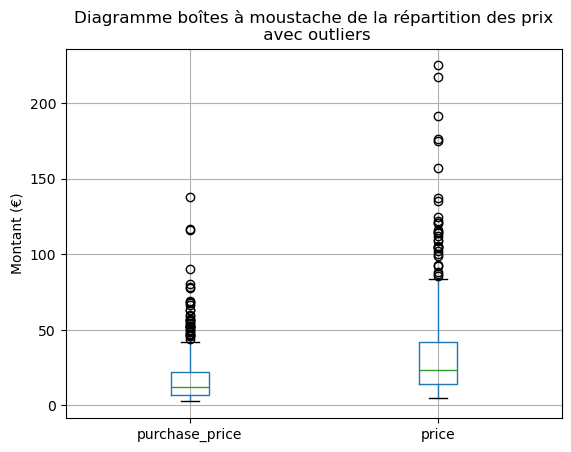

In [104]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_data.boxplot(column=["purchase_price","price"])
plt.ylabel("Montant (€)")
plt.title("Diagramme boîtes à moustache de la répartition des prix\n avec outliers")
plt.show()

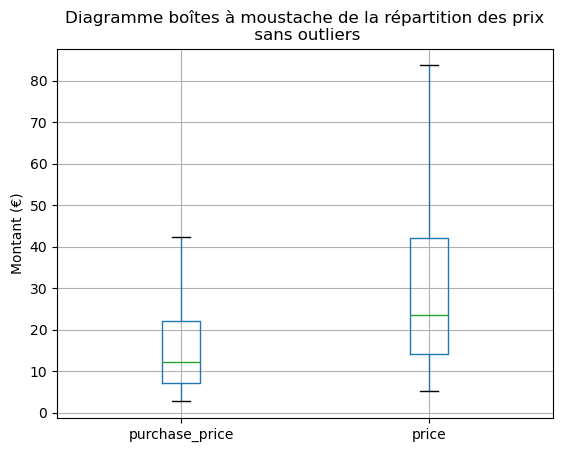

In [105]:
df_data.boxplot(column=["purchase_price","price"],showfliers=False)
plt.ylabel("Montant (€)")
plt.title("Diagramme boîtes à moustache de la répartition des prix\n sans outliers")
plt.show()

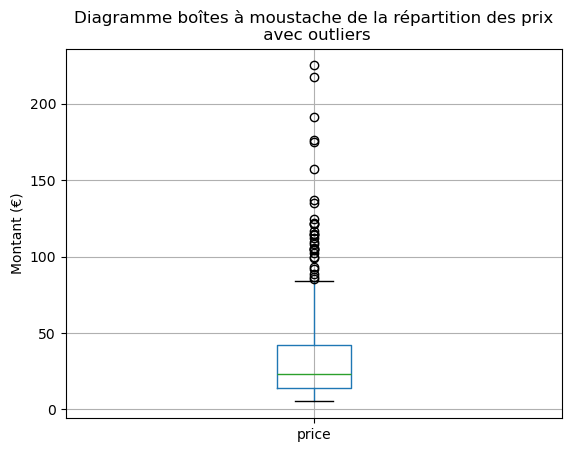

In [106]:
df_data.boxplot(column=["price"],showfliers=True)
plt.ylabel("Montant (€)")
plt.title("Diagramme boîtes à moustache de la répartition des prix\n avec outliers")
plt.savefig("boxplot_price.png")
plt.show()

In [107]:
#Autre méthode avec plotly express : histogramme
hist = px.histogram(df_data, x="purchase_price", title="Distribution des prix d'achat des articles")
hist.show()

In [108]:
#Autre méthode avec plotly express : histogramme
hist = px.histogram(df_data, x="price", title="Distribution des prix de vente des articles")
hist.show()

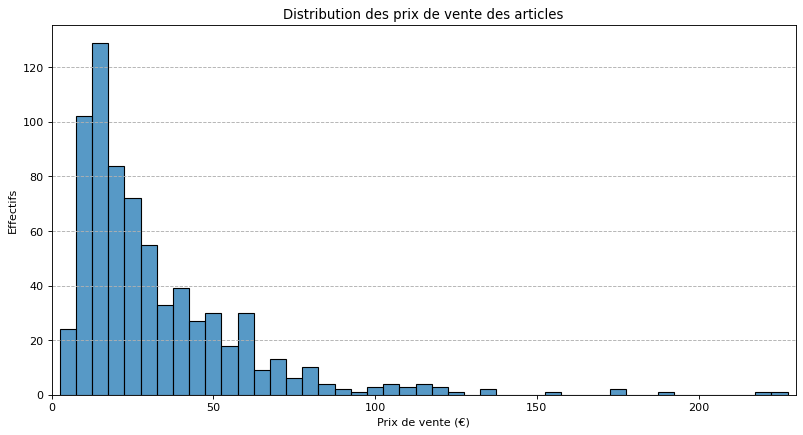

In [109]:
fig = plt.figure(figsize=(12,6), dpi=80)
sb.histplot(x=df_data["price"],bins=np.linspace(2.5,227.5,46))
plt.xlabel("Prix de vente (€)")
plt.ylabel("Effectifs")
plt.xlim([0,230])
plt.title("Distribution des prix de vente des articles")
plt.grid(visible=True,axis='y',linestyle='--')
plt.savefig("histo_price.png")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [110]:
#Calculer la moyenne du prix
m = (df_data['price']).mean()
print("Prix de vente moyen des articles : ",round(m,2), "€")
#Calculer l'écart-type du prix
s = (df_data['price']).std()
print("Écart-type prix de vente des articles : ",round(s,2), "€")
#Calculer le Z-score
df_data["price_z"] = (df_data["price"] - m) / s

Prix de vente moyen des articles :  32.33 €
Écart-type prix de vente des articles :  27.6 €


In [111]:
#Quel est le seuil prix dont z-score est supérieur à 3 ?
zscore = 3
print("Prix de vente pour lequel z >= 3 : ", round(zscore*s+m,2), "€")
df_data3z = (df_data.loc[df_data['price_z'] > zscore])
print("Nombre d'articles de notre ERP au-delà de ce prix : ", df_data3z.shape[0])
display(df_data3z)

Prix de vente pour lequel z >= 3 :  115.12 €
Nombre d'articles de notre ERP au-delà de ce prix :  13


id_web  product_id  onsale_web  price  stock_quantity stock_status  \
199  15940        4352           1  225.0               0   outofstock   
218   3510        4402           1  176.0              11      instock   
221   7819        4406           1  157.0              12      instock   
381  14220        4904           1  137.0               9      instock   
426  14581        5001           1  217.5              18      instock   
511  14915        5612           1  124.8              19      instock   
553  15185        5767           1  175.0              12      instock   
587  14983        5892           1  191.3              98      instock   
603  14775        5917           1  122.0              12      instock   
642  14923        6126           1  135.0             138      instock   
648  15126        6202           1  116.4              12      instock   
654  15072        6213           1  121.0               9      instock   
657  15070        6216           1  121.0              14      instock   

     purchase_price    sku  total_sales product_type  \
199          137.81  15940         11.0    Champagne   
218           78.25   3510          3.0       Cognac   
221           69.08   7819          4.0       Cognac   
381           67.95  14220          3.0          Vin   
426          116.87  14581          2.0          Vin   
511           66.41  14915          1.0          Vin   
553           90.42  15185          4.0          Vin   
587          116.06  14983          6.0    Champagne   
603           54.24  14775          3.0       Whisky   
642           80.33  14923          5.0    Champagne   
648           63.15  15126          5.0          Vin   
654           63.14  15072          3.0          Vin   
657           60.02  15070          2.0          Vin   

                                            post_title  id_product   price_z  
199     Champagne Egly-Ouriet Grand Cru Millésimé 2008        4352  6.981591  
218                               Cognac Frapin VIP XO        4402  5.205993  
221  Cognac Frapin Château de Fontpinot 1989 20 Ans...        4406  4.517496  
381  Domaine Des Croix Corton Charlemagne Grand Cru...        4904  3.792762  
426     David Duband Charmes-Chambertin Grand Cru 2014        5001  6.709816  
511  Domaine Weinbach Gewurztraminer Grand Cru Furs...        5612  3.350674  
553                Camille Giroud Clos de Vougeot 2016        5767  5.169756  
587  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...        5892  5.760415  
603  Wemyss Malts Single Cask Scotch Whisky Choc 'n...        5917  3.249211  
642             Champagne Gosset Célébris Vintage 2007        6126  3.720288  
648  Domaine Clerget Echezeaux Grand Cru En Orveaux...        6202  3.046286  
654  Domaine des Comtes Lafon Volnay 1er Cru Santen...        6213  3.212975  
657  Domaine des Comtes Lafon Volnay 1er Cru Champa...        6216  3.212975

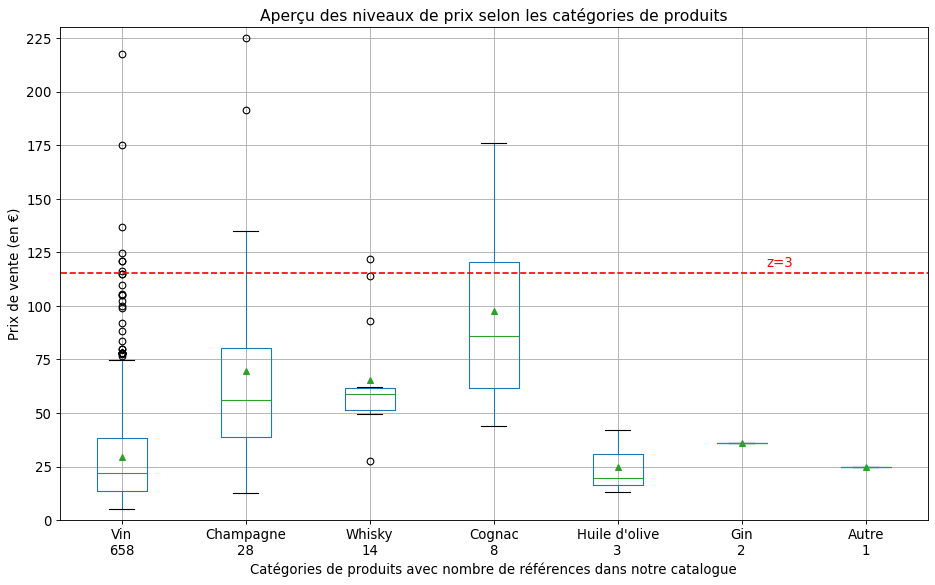

In [112]:
# Boîtes à moustaches pour l'analyse des prix selon la catégorie de produit
L_cat = list(df_data.groupby('product_type').count().sort_values(by="product_id",ascending=False).index)

fig = plt.figure(figsize=(14,8), dpi=80)

for i in np.arange(len(L_cat)):
    cat = L_cat[i]
    df_data.loc[df_data["product_type"] == cat].boxplot(column=["price"],\
                                                        positions=[i], widths=[0.4], showmeans=True)
    L_cat[i] = cat + "\n" + str(len(df_data.loc[df_data["product_type"] == cat]))

plt.plot(np.linspace(-1,7,17), [3*s+m]*17, linestyle="dashed", color="red")
plt.text(5.2, 3*s+m+3, "z=3", color="red", fontsize=12)
plt.xticks(ticks=np.arange(0,7), labels=L_cat, fontsize=12)
plt.xlabel("Catégories de produits avec nombre de références dans notre catalogue", fontsize=12)
plt.ylabel("Prix de vente (en €)", fontsize=12)
plt.xlim([-0.5,6.5])
plt.ylim([0,230])
plt.yticks(ticks=np.linspace(0,225,10),fontsize=12)
plt.title("Aperçu des niveaux de prix selon les catégories de produits", fontsize=14)
plt.savefig("catprice.png")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [113]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
dcr_price = df_data.describe()['price']
display(dcr_price)

count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64

In [114]:
#Définissez un seuil pour les articles "outliers" en prix
seuil_out = (dcr_price['75%']-dcr_price['25%'])*1.5 + dcr_price['75%']
print("Seuil de prix de vente outliers :", seuil_out, "€")

Seuil de prix de vente outliers : 84.09375 €


In [115]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
df_data_out = (df_data.loc[df_data['price'] > seuil_out])
print("Nombre d'articles de notre ERP au-delà de ce prix : ", df_erp.loc[df_erp["price"] > seuil_out].shape[0])
print("Nombre d'articles de notre catalogue en ligne au-delà de ce prix :", df_data_out.shape[0])
print("Soit, en proportion :", round(
      100 * (df_data_out.loc[df_data_out['id_web'].isnull() == False].shape[0]) /
      (df_web.shape[0]),1), "%") # On retire le bon cadeau 25 € du calcul

Nombre d'articles de notre ERP au-delà de ce prix :  35
Nombre d'articles de notre catalogue en ligne au-delà de ce prix : 31
Soit, en proportion : 4.3 %


**Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?**<br>

Dans le milieu des vins et spiritueux, ce n'est pas forcément aberrant d'avoir de fortes dispersions de prix, d'autant plus que nous n'avons pas fait le recoupement avec le prix d'achat de ces mêmes produits.<br>
Par exemple, calculons pour chaque article le ratio prix de vente / prix d'achat :

In [116]:
df_data["price_ratio"] = round(df_data["price"]/df_data["purchase_price"],2)
dcr_price_ratio = df_data.describe()['price_ratio']
display(dcr_price_ratio)
seuil_ratio_out = (dcr_price_ratio['75%']-dcr_price_ratio['25%'])*1.5 + dcr_price_ratio['75%']
display((df_data.loc[(df_data['price'] > seuil_out) & (df_data['price_ratio'] > seuil_ratio_out),["id_web","product_id","price","price_ratio","product_type","post_title"]]))

count    714.000000
mean       1.933207
std        0.116495
min        0.160000
25%        1.880000
50%        1.940000
75%        2.000000
max        2.300000
Name: price_ratio, dtype: float64

id_web  product_id  price  price_ratio product_type  \
218   3510        4402  176.0         2.25       Cognac   
221   7819        4406  157.0         2.27       Cognac   
222   3509        4407  104.0         2.23       Cognac   
602  14774        5916   93.0         2.30       Whisky   
603  14775        5917  122.0         2.25       Whisky   

                                            post_title  
218                               Cognac Frapin VIP XO  
221  Cognac Frapin Château de Fontpinot 1989 20 Ans...  
222                          Cognac Frapin Cigar Blend  
602  Wemyss Malts Single Cask Scotch Whisky Chocola...  
603  Wemyss Malts Single Cask Scotch Whisky Choc 'n...

Les produits en question ne sont pas des vins, or plus de 92% des produits de notre catalogue sont des vins.<br>
Il n'est pas anormal que les prix pratiqués sur ces produits (Whisky, Cognac) soient significativement différents.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [117]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_data["CA_article"] = df_data["price"] * df_data["total_sales"]
#Calculez la somme de la colonne "CA_article"
CA_total = df_data["CA_article"].sum()
print("CA total octobre :", round(CA_total,2), "€")
#Ce résultat correspond au chiffre d'affaire du site web

CA total octobre : 143680.1 €


In [118]:
# Création d'un DataFrame associant les catégories de produits à des couleurs
couleurs = {"product_type": ["Vin","Champagne","Whisky","Cognac","Huile d'olive","Gin","Autre","Autres"],
           "couleur": ["royalblue","gold","orangered","darkgoldenrod","olivedrab","aqua","limegreen","mediumorchid"]}
df_couleurs = pd.DataFrame(data=couleurs)
display(df_couleurs)

product_type        couleur
0            Vin      royalblue
1      Champagne           gold
2         Whisky      orangered
3         Cognac  darkgoldenrod
4  Huile d'olive      olivedrab
5            Gin           aqua
6          Autre      limegreen
7         Autres   mediumorchid

CA_article
Vin          123518.0
Champagne     12928.6
Cognac         3170.2
Whisky         2886.6
Autres         1176.7

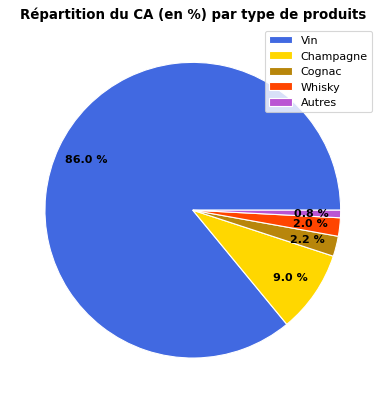

In [119]:
#CA par catégories de produits
df_data_aggcat = (df_data.groupby('product_type')[["CA_article"]].sum()).sort_values("CA_article",ascending=False)

df_toplot = df_data_aggcat.loc[df_data_aggcat["CA_article"] > 2500].copy()
others_row = pd.DataFrame(data={"CA_article": (df_data_aggcat.loc[df_data_aggcat["CA_article"] <= 2500, "CA_article"]).sum()},
                         index=["Autres"])

df_toplot = pd.concat([df_toplot, others_row], axis=0, ignore_index=False)
display(df_toplot)

#Affichage graphique : diagramme en secteurs
fig = plt.figure(figsize=(6,6), dpi=80)

plt.pie(df_toplot["CA_article"],\
        colors=(df_toplot.merge(df_couleurs, how="inner", left_index=True, right_on="product_type"))["couleur"],\
        pctdistance=0.8,\
        wedgeprops={'edgecolor': 'w'},\
        autopct=lambda x: f"{x:.1f} %",\
        textprops={'fontweight': 'bold'})
plt.legend(list(df_toplot.index), loc='best')
plt.title("Répartition du CA (en %) par type de produits", fontsize=12, fontweight='heavy')
plt.savefig("CA_categorie.png")
plt.show()

In [120]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_data.sort_values("CA_article", ascending=False,inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_data.reset_index(inplace=True,drop=True)
#Afficher les 20 premier articles en CA
df_data_20CA = (df_data.loc[:,["product_id","product_type","post_title","CA_article"]]).head(20)
display(df_data_20CA)


product_id product_type  \
0         4352    Champagne   
1         5892    Champagne   
2         4353    Champagne   
3         5826          Vin   
4         6212          Vin   
5         5026    Champagne   
6         5008          Vin   
7         5767          Vin   
8         6126    Champagne   
9         5025    Champagne   
10        6201          Vin   
11        4406       Cognac   
12        4647          Vin   
13        4358    Champagne   
14        4359    Champagne   
15        6214          Vin   
16        6202          Vin   
17        4350    Champagne   
18        4573          Vin   
19        4402       Cognac   

                                           post_title  CA_article  
0      Champagne Egly-Ouriet Grand Cru Millésimé 2008      2475.0  
1   Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...      1147.8  
2           Champagne Egly-Ouriet Grand Cru Brut Rosé      1113.0  
3               Agnès Levet Côte Rôtie Améthyste 2017       824.0  
4   Domaine des Comtes Lafon Volnay 1er Cru Santen...       805.0  
5   Champagne Agrapart &amp; Fils Minéral Extra Br...       781.2  
6   Domaine des Comtes Lafon Volnay 1er Cru Santen...       735.0  
7                 Camille Giroud Clos de Vougeot 2016       700.0  
8              Champagne Gosset Célébris Vintage 2007       675.0  
9   Champagne Agrapart &amp; Fils L'Avizoise Extra...       672.0  
10  David Duband Chambolle-Musigny 1er Cru Les Sen...       633.6  
11  Cognac Frapin Château de Fontpinot 1989 20 Ans...       628.0  
12  Bernard Baudry Chinon Rouge La Croix Boissée 2017       627.0  
13  Champagne Larmandier-Bernier Grand Cru Vieille...       616.0  
14  Champagne Larmandier-Bernier Grand Cru Les Che...       599.2  
15  Domaine des Comtes Lafon Volnay 1er Cru Champa...       594.0  
16  Domaine Clerget Echezeaux Grand Cru En Orveaux...       582.0  
17    Champagne Egly-Ouriet Grand Cru Extra Brut V.P.       556.5  
18  Château de Meursault Beaune-Grèves Les Trois J...       537.6  
19                               Cognac Frapin VIP XO       528.0

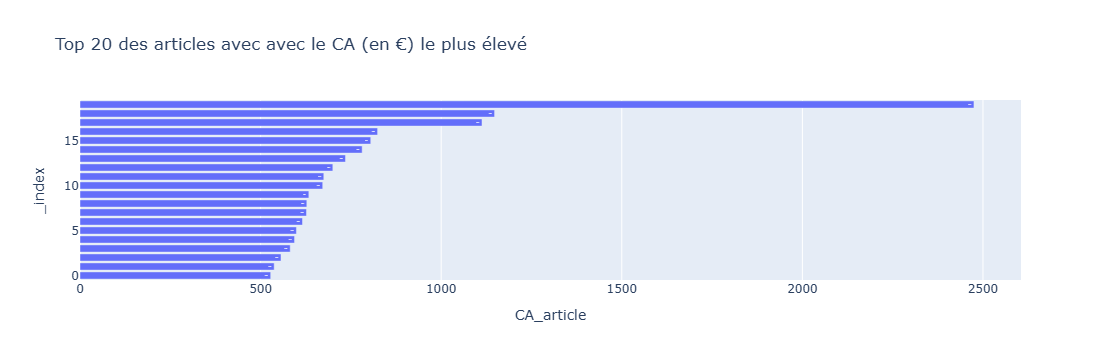

In [121]:
#Graphique en barre des 20 premiers articles avec plotly express
df_data_20CA.sort_values("CA_article", ascending=True,inplace=True)
df_data_20CA.reset_index(inplace=True)
px.bar(data_frame=df_data_20CA, x="CA_article", text="product_id", title="Top 20 des articles avec avec le CA (en €) le plus élevé")

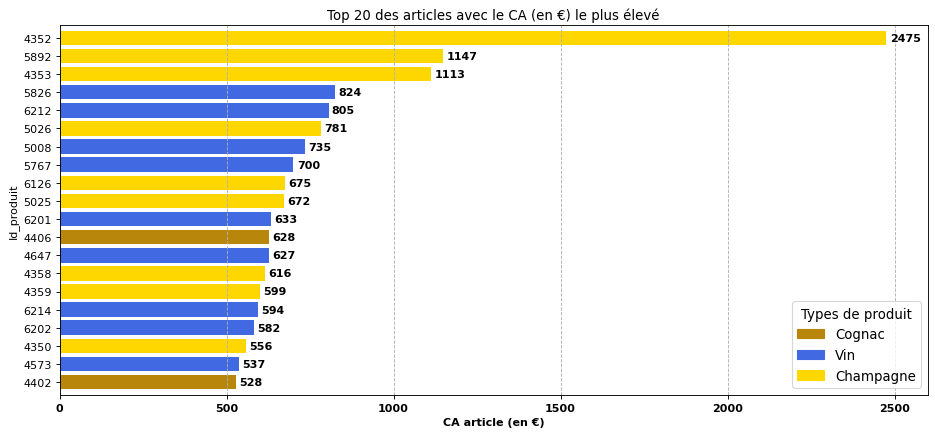

In [122]:
#Graphique avec pyplot
fig = plt.figure(figsize=(14,6), dpi=80)

df_color_data = (df_data_20CA.merge(df_couleurs, how="inner", left_on="product_type", right_on="product_type"))

p=plt.barh(1+np.arange(df_data_20CA.shape[0]),
           df_data_20CA['CA_article'],
           tick_label=df_data_20CA['product_id'],
           color=df_color_data["couleur"])
plt.bar_label(p, label_type='edge', fmt='%d', padding=3.0, fontsize=10, fontweight='bold')
plt.grid(visible=True, axis='x', linestyle='--')
plt.xlabel('CA article (en €)',fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel("Id_produit")
plt.ylim([0.3,20.7])

# Utilisation de patches pour faire une légende propre
cat_couleurs = df_color_data.set_index("product_type")["couleur"].to_dict()
patches = [mpatches.Patch(color=couleur, label=cat) for cat, couleur in cat_couleurs.items()]
plt.legend(handles=patches, title="Types de produit", title_fontsize=12, loc="best", fontsize=12)

plt.title("Top 20 des articles avec le CA (en €) le plus élevé")
plt.savefig("Top20_CA.png")

plt.show()

In [123]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_data["% CA"] = 100 * (df_data["CA_article"] / CA_total)

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_data["CumSum % CA"] = (df_data["% CA"]).cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
print("Nombre minimal d'articles les plus chers tous différents représentant 80% du CA :",(df_data.loc[df_data["CumSum % CA"]<80]).shape[0]+1)
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
print("Soit, en proportion du nombre d'articles de notre catalogue :", round(
      100 * ((df_data.loc[df_data["CumSum % CA"]<80]).shape[0]+1) / (df_web.shape[0]),1), "%")

Nombre minimal d'articles les plus chers tous différents représentant 80% du CA : 435
Soit, en proportion du nombre d'articles de notre catalogue : 60.9 %


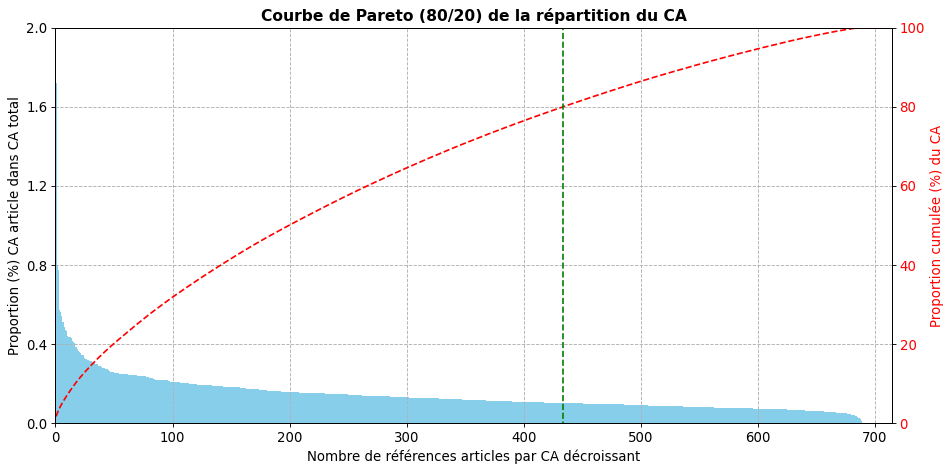

In [124]:
#Courbe de Pareto pour affichage graphique du 80/20
df_data.reset_index(inplace=True,drop=True)

fig, ax1 = plt.subplots(figsize=(12,6), dpi=80)

p=ax1.bar(x=df_data.index.values+0.5, height=df_data['% CA'], width=1, color="skyblue")

ax1.set_xlabel("Nombre de références articles par CA décroissant", fontsize=12)
ax1.set_xlim([0,df_web.shape[0]+0.5])
ax1.set_ylabel("Proportion (%) CA article dans CA total", fontsize=12)
ax1.set_ylim([0,2])
ax1.set_yticks(np.linspace(0,2,6))
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
plt.grid(visible=True, axis='both', linestyle='--')

ax2 = ax1.twinx()  # crée un nouveau jeu d'axes avec le même axe x que ax1

ax2.plot(df_data.index.values+0.5,df_data['CumSum % CA'],'--',color='red')

ax2.set_ylabel("Proportion cumulée (%) du CA", color='red', fontsize=12)
ax2.set_ylim([0,100])
ax2.set_yticks(np.linspace(0,100,6))
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
plt.title("Courbe de Pareto (80/20) de la répartition du CA", fontsize=14, fontweight='heavy')
fig.tight_layout() # Pour affichage optimal du 2nd axe vertical à droite

plt.plot([(df_data.loc[df_data["CumSum % CA"]<80]).shape[0]]*13, np.linspace(-10,110,13), color='green', linestyle='dashed')
#plt.plot(np.linspace(-1,df_web.shape[0]+1,33), [80]*33, color='coral', linestyle='dashdot')

plt.savefig("Pareto_CA.png")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [125]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_data.sort_values("total_sales", ascending=False,inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_data.reset_index(inplace=True, drop=True)
#Afficher les 20 premiers articles en quantité
#BSQ pour Best Sales Quantities
df_data_20BSQ = (df_data.loc[:,["product_id","product_type","post_title","total_sales"]]).head(20)
display(df_data_20BSQ)

product_id product_type  \
0         4867          Vin   
1         4203          Vin   
2         4275          Vin   
3         4726          Vin   
4         4647          Vin   
5         5826          Vin   
6         6129          Vin   
7         4220          Vin   
8         5803          Vin   
9         6569          Vin   
10        5778          Vin   
11        5695          Vin   
12        5777          Vin   
13        4059          Vin   
14        4863          Vin   
15        4188          Vin   
16        4870          Vin   
17        4105          Vin   
18        4204          Vin   
19        4159          Vin   

                                           post_title  total_sales  
0   Château De La Selve IGP Coteaux de l'Ardèche M...         36.0  
1   Mas Laval IGP Pays d'Hérault Les Pampres Blanc...         27.0  
2               I Fabbri Chianti Classico Lamole 2017         24.0  
3            François Baur Pinot Noir Schlittweg 2017         22.0  
4   Bernard Baudry Chinon Rouge La Croix Boissée 2017         22.0  
5               Agnès Levet Côte Rôtie Améthyste 2017         20.0  
6   Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...         20.0  
7   Xavier Frissant Touraine Amboise Chenin Les Pi...         18.0  
8                Château Tour Haut-Caussan Médoc 2015         17.0  
9                Decelle-Villa Chorey-Lès-Beaune 2016         17.0  
10                       Maurel Pays d'Oc Merlot 2018         17.0  
11    Philippe Nusswitz IGP Cévènnes Rosé O Pale 2019         16.0  
12           Maurel Pays d'Oc Cabernet-Sauvignon 2017         16.0  
13  Mourgues du Grès Costières de Nîmes Galets Ros...         16.0  
14  Château Ollieux Romanis Corbières Rosé Classiq...         16.0  
15  Château de La Liquière Languedoc Blanc Les Ama...         16.0  
16                Triennes IGP Méditerranée Rosé 2019         16.0  
17        Emile Boeckel Sylvaner Vieilles Vignes 2019         16.0  
18  Mas Laval IGP Pays d'Hérault Les Pampres Rouge...         15.0  
19             Planeta Sicilia La Segreta Bianco 2017         15.0

In [126]:
#Graphique en barre des 20 premiers articles avec plotly express
df_data_20BSQ.sort_values("total_sales", ascending=True,inplace=True)
df_data_20BSQ.reset_index(inplace=True)
px.bar(data_frame=df_data_20BSQ, x="total_sales", text="product_id", title="Top 20 des articles les plus vendus")

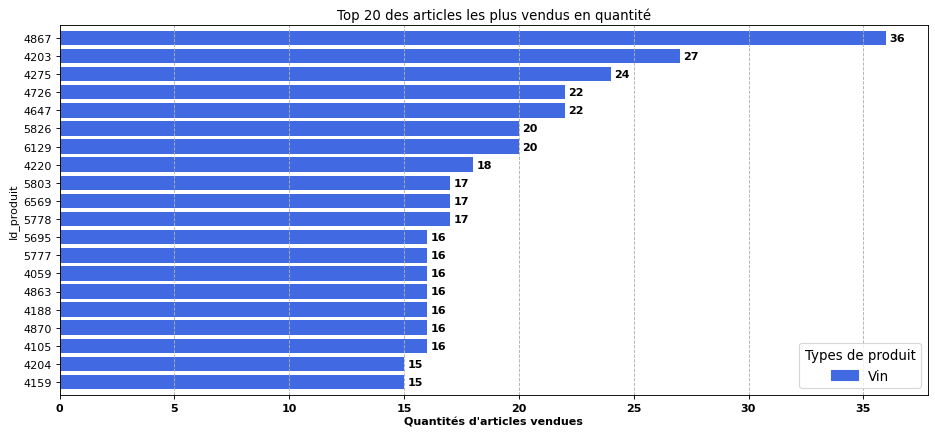

In [127]:
#Graphique avec pyplot
fig = plt.figure(figsize=(14,6), dpi=80)

df_color_data = (df_data_20BSQ.merge(df_couleurs, how="inner", left_on="product_type", right_on="product_type"))

p=plt.barh(1+np.arange(df_data_20BSQ.shape[0]),
           df_data_20BSQ['total_sales'],
           tick_label=df_data_20BSQ['product_id'],
           color=df_color_data["couleur"])
plt.bar_label(p, label_type='edge', fmt='%d', padding=3.0, fontsize=10, fontweight='bold')
plt.grid(visible=True, axis='x', linestyle='--')
plt.xlabel("Quantités d'articles vendues",fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel("Id_produit")
plt.ylim([0.3,20.7])

# Utilisation de patches pour faire une légende propre
cat_couleurs = df_color_data.set_index("product_type")["couleur"].to_dict()
patches = [mpatches.Patch(color=couleur, label=cat) for cat, couleur in cat_couleurs.items()]
plt.legend(handles=patches, title="Types de produit", title_fontsize=12, loc="best", fontsize=12)

plt.title("Top 20 des articles les plus vendus en quantité")
plt.savefig("Top20_BSQ.png")

plt.show()

In [128]:
#####################################################
# Calculer le 20 / 80 en quantité d'articles vendus #
#####################################################
Qt_total = (df_data["total_sales"]).sum()
#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_data["% Qt"] = 100 * (df_data["total_sales"] / Qt_total)
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_data["CumSum % Qt"] = (df_data["% Qt"]).cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
print("Nombre minimal d'articles les plus vendus tous différents représentant 80% des ventes en quantité :",(df_data.loc[df_data["CumSum % Qt"]<80]).shape[0]+1)
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
print("Soit, en proportion du nombre d'articles de notre catalogue :", round(
      100 * ((df_data.loc[df_data["CumSum % Qt"]<80]).shape[0]+1) / (df_web.shape[0]),1), "%")

Nombre minimal d'articles les plus vendus tous différents représentant 80% des ventes en quantité : 434
Soit, en proportion du nombre d'articles de notre catalogue : 60.8 %


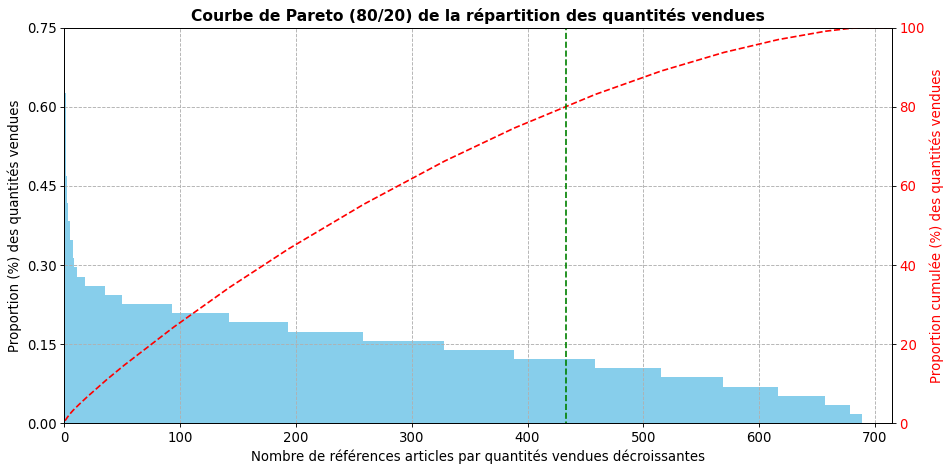

In [129]:
#Courbe de Pareto pour affichage graphique du 80/20
df_data.reset_index(inplace=True, drop=True)

fig, ax1 = plt.subplots(figsize=(12,6), dpi=80)

p=ax1.bar(x=df_data.index.values+0.5, height=df_data['% Qt'], width=1, color="skyblue")

ax1.set_xlabel("Nombre de références articles par quantités vendues décroissantes", fontsize=12)
ax1.set_xlim([0,df_web.shape[0]+0.5])
ax1.set_ylabel("Proportion (%) des quantités vendues", fontsize=12)
ax1.set_ylim([0,0.75])
ax1.set_yticks(np.linspace(0,0.75,6))
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
plt.grid(visible=True, axis='both', linestyle='--')

ax2 = ax1.twinx()  # crée un nouveau jeu d'axes avec le même axe x que ax1

ax2.plot(df_data.index.values+0.5,df_data['CumSum % Qt'],'--',color='red')

ax2.set_ylabel("Proportion cumulée (%) des quantités vendues", color='red', fontsize=12)
ax2.set_ylim([0,100])
ax2.set_yticks(np.linspace(0,100,6))
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
plt.title("Courbe de Pareto (80/20) de la répartition des quantités vendues", fontsize=14, fontweight='heavy')
fig.tight_layout() # Pour affichage optimal du 2nd axe vertical à droite

plt.plot([(df_data.loc[df_data["CumSum % Qt"]<80]).shape[0]]*13, np.linspace(-10,110,13), color='green', linestyle='dashed')
#plt.plot(np.linspace(-1,df_web.shape[0]+1,33), [80]*33, color='coral', linestyle='dashdot')

plt.savefig("Pareto_Qt.png")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [130]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne nombre de mois de stock en se basant sur les données du seul mois d'octobre
df_data["mois_stock"] = df_data["stock_quantity"] / df_data["total_sales"]
print("Produits encore en stock mais pour lesquels il n'y a pas eu de vente en octobre :")
display(df_data.loc[(df_data["total_sales"]==0) & (df_data["stock_quantity"]>0),
        ["product_id","product_type","post_title","total_sales","stock_quantity","price","mois_stock"]])

Produits encore en stock mais pour lesquels il n'y a pas eu de vente en octobre :


product_id product_type                                      post_title  \
692        5932       Cognac                    Cognac Normandin Mercier VFC   
694        4337    Champagne   Champagne Mailly Grand Cru Les Echansons 2007   
697        4355    Champagne  Champagne Egly-Ouriet Grand Cru Blanc de Noirs   

     total_sales  stock_quantity  price  mois_stock  
692          0.0              13  59.90         inf  
694          0.0             145  83.00         inf  
697          0.0              97  12.65         inf

In [131]:
#Remplacement des "inf" par 0
df_data.replace(np.inf, 0.0, inplace=True)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_data.sort_values("mois_stock", ascending=False,inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_data.reset_index(inplace=True, drop=True)
#MS pour Mois Stock
df_data_20MS = (df_data.loc[:,["product_id","product_type","post_title","total_sales","stock_quantity","mois_stock"]]).head(20)
print("Données associées aux produits avec le plus de mois de stock :")
display(df_data_20MS)

Données associées aux produits avec le plus de mois de stock :


product_id product_type  \
0         4142    Champagne   
1         6126    Champagne   
2         4356    Champagne   
3         4348    Champagne   
4         4148    Champagne   
5         4357    Champagne   
6         4144    Champagne   
7         5025    Champagne   
8         4350    Champagne   
9         4150    Champagne   
10        4334    Champagne   
11        4149    Champagne   
12        5612          Vin   
13        4582          Vin   
14        5024    Champagne   
15        4970    Champagne   
16        5892    Champagne   
17        4359    Champagne   
18        4141    Champagne   
19        4146    Champagne   

                                           post_title  total_sales  \
0               Champagne Gosset Grand Millésime 2006          4.0   
1              Champagne Gosset Célébris Vintage 2007          5.0   
2   Champagne Egly-Ouriet Premier Cru Les Vignes d...          3.0   
3      Champagne Egly-Ouriet Grand Cru Brut Tradition          5.0   
4                Champagne Mailly Grand Cru Brut Rosé          3.0   
5               Champagne Larmandier-Bernier Latitude          5.0   
6                         Champagne Gosset Grand Rosé          4.0   
7   Champagne Agrapart &amp; Fils L'Avizoise Extra...          6.0   
8     Champagne Egly-Ouriet Grand Cru Extra Brut V.P.          7.0   
9        Champagne Mailly Grand Cru Intemporelle 2010          6.0   
10             Champagne Gosset Grand Blanc de Blancs          7.0   
11  Champagne Mailly Grand Cru Intemporelle Rosé 2009          5.0   
12  Domaine Weinbach Gewurztraminer Grand Cru Furs...          1.0   
13  Château de Meursault Puligny-Montrachet 1er Cr...          1.0   
14  Champagne Agrapart &amp; Fils Les 7 Crus Brut ...          6.0   
15  Champagne Larmandier-Bernier Terre de Vertus P...          6.0   
16  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...          6.0   
17  Champagne Larmandier-Bernier Grand Cru Les Che...          7.0   
18                    Champagne Gosset Grande Réserve          8.0   
19            Champagne Mailly Grand Cru Brut Réserve          6.0   

    stock_quantity  mois_stock  
0              125   31.250000  
1              138   27.600000  
2               81   27.000000  
3              125   25.000000  
4               71   23.666667  
5              115   23.000000  
6               91   22.750000  
7              136   22.666667  
8              145   20.714286  
9              123   20.500000  
10             142   20.285714  
11             101   20.200000  
12              19   19.000000  
13              18   18.000000  
14             103   17.166667  
15             100   16.666667  
16              98   16.333333  
17             112   16.000000  
18             123   15.375000  
19              86   14.333333

In [132]:
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
df_data_20MS.sort_values("mois_stock", ascending=True,inplace=True)
df_data_20MS.reset_index(inplace=True)
px.bar(data_frame=df_data_20MS, x="mois_stock", text="product_id", title="Flop 20 des articles qui ont le plus de mois de stock")

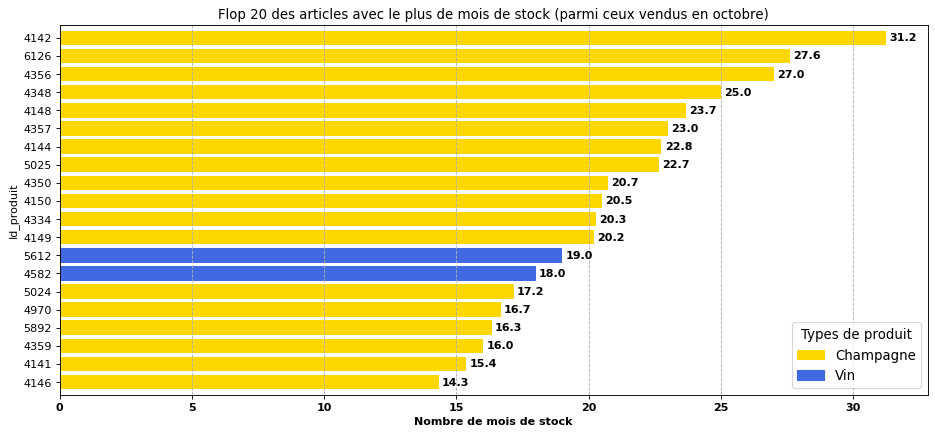

In [133]:
#Graphique avec pyplot
fig = plt.figure(figsize=(14,6), dpi=80)

df_color_data = (df_data_20MS.merge(df_couleurs, how="inner", left_on="product_type", right_on="product_type"))

p=plt.barh(1+np.arange(df_data_20MS.shape[0]),
           df_data_20MS['mois_stock'],
           tick_label=df_data_20MS['product_id'],
           color=df_color_data["couleur"])
plt.bar_label(p, label_type='edge', fmt='%.1f', padding=3.0, fontsize=10, fontweight='bold')
plt.grid(visible=True, axis='x', linestyle='--')
plt.xlabel("Nombre de mois de stock",fontweight='bold')
plt.xticks(fontweight='bold')
plt.ylabel("Id_produit")
plt.ylim([0.3,20.7])

# Utilisation de patches pour faire une légende propre
cat_couleurs = df_color_data.set_index("product_type")["couleur"].to_dict()
patches = [mpatches.Patch(color=couleur, label=cat) for cat, couleur in cat_couleurs.items()]
plt.legend(handles=patches, title="Types de produit", title_fontsize=12, loc="best", fontsize=12)

plt.title("Flop 20 des articles avec le plus de mois de stock (parmi ceux vendus en octobre)")
plt.savefig("Flop20_MS.png")

plt.show()

In [134]:
####################################
# Valorisation des stocks en euros #
####################################

#Attention, ici ce sont les données de l'erp qu'il faut utiliser !
#Pas besoin des données obtenues avec jointure
#Création de la colonne Valorisation des stocks en euros
df_erp["valeur_stock"] = df_erp["purchase_price"]*df_erp["stock_quantity"]*(df_erp["stock_status"].apply(lambda s: 0 if s=="outofstock" else 1))
display(df_erp[["product_id","purchase_price","stock_quantity","valeur_stock"]])
#Calculer la somme de la colonne "Valorisation_stock_euros"
print("Valeur totale (au prix d'achat) des produits en stock :", round(df_erp["valeur_stock"].sum(),2),"€")

product_id  purchase_price  stock_quantity  valeur_stock
0          3847           12.88              16        206.08
1          3849           17.54              10        175.40
2          3850           10.64               0          0.00
3          4032            6.92              26        179.92
4          4039           23.77               3         71.31
..          ...             ...             ...           ...
820        7203           23.48              30        704.40
821        7204           24.18               9        217.62
822        7247           27.18               6        163.08
823        7329           13.42              14        187.88
824        7338            8.00              40        320.00

[825 rows x 4 columns]

Valeur totale (au prix d'achat) des produits en stock : 298627.66 €


In [135]:
################################################
# Détermination du nombre de produits en stock #
################################################

#Calculer la somme de la colonne stock quantity
total_Qt_stock = (df_erp["stock_quantity"]*(df_erp["stock_status"].apply(lambda s: 0 if s=="outofstock" else 1))).sum()
print("Nombre total de produits en stock :",total_Qt_stock)

Nombre total de produits en stock : 17822


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [136]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT : nos prix de vente (TTC) incluent une TVA à 20% (vins et spiritueux)
taux_TVA = 0.2
df_data["prix_HT"] = round(df_data["price"]/(1+taux_TVA),2)
#Création de la colonne Taux de marge
df_data["taux_marge %"] = round(100 * ((df_data["prix_HT"] / df_data["purchase_price"]) - 1),2)
#Afficher le prix minimum de la colonne "taux_marge"
print("Plus petite marge parmi l'ensemble de nos produits :",(df_data["taux_marge %"]).min(),"%")
#Afficher le prix maximum de la colonne "taux_marge"
print("Plus grande marge parmi l'ensemble de nos produits :",(df_data["taux_marge %"]).max(),"%")
#La sortie suivante n'affiche que les produits encore en vente sur le site web
display((df_data.loc[df_data["onsale_web"]==1]).sort_values("taux_marge %",ascending=False,inplace=False)
        [["product_id","onsale_web","stock_quantity","product_type","post_title","prix_HT","purchase_price","taux_marge %"]])

Plus petite marge parmi l'ensemble de nos produits : -86.4 %
Plus grande marge parmi l'ensemble de nos produits : 91.41 %


product_id  onsale_web  stock_quantity   product_type  \
655        5916           1               1         Whisky   
540        4401           1               5         Cognac   
181        4406           1              12         Cognac   
481        5912           1               4         Whisky   
36         4402           1              11         Cognac   
..          ...         ...             ...            ...   
20         5027           1              79      Champagne   
22         5761           1             125  Huile d'olive   
18         4141           1             123      Champagne   
59         5760           1              24  Huile d'olive   
690        4355           1              97      Champagne   

                                            post_title  prix_HT  \
655  Wemyss Malts Single Cask Scotch Whisky Chocola...    77.50   
540                                 Cognac Frapin VSOP    52.08   
181  Cognac Frapin Château de Fontpinot 1989 20 Ans...   130.83   
481   Kingsbarns Distillery Lowland Single Malt Whisky    47.50   
36                                Cognac Frapin VIP XO   146.67   
..                                                 ...      ...   
20   Champagne Agrapart &amp; Fils Terroirs Brut Bl...    51.75   
22         Huiles d'Olive Extra Vierge Planeta 3x 10cl    16.25   
18                     Champagne Gosset Grande Réserve    32.50   
59             Huile d'Olive Extra Vierge Planeta 50cl    10.92   
690     Champagne Egly-Ouriet Grand Cru Blanc de Noirs    10.54   

     purchase_price  taux_marge %  
655           40.49         91.41  
540           27.21         91.40  
181           69.08         89.39  
481           25.08         89.39  
36            78.25         87.44  
..              ...           ...  
20            38.04         36.04  
22            12.07         34.63  
18            24.86         30.73  
59             8.43         29.54  
690           77.48        -86.40  

[713 rows x 8 columns]

In [137]:
#affichage de la ligne avec un taux de marge inférieur à 0 parmi les produits encore en vente sur le site
display(df_data.loc[(df_data["taux_marge %"]<0)]
       [["product_id","onsale_web","product_type","post_title","stock_quantity","total_sales","prix_HT","purchase_price","taux_marge %"]])

product_id  onsale_web product_type  \
690        4355           1    Champagne   

                                         post_title  stock_quantity  \
690  Champagne Egly-Ouriet Grand Cru Blanc de Noirs              97   

     total_sales  prix_HT  purchase_price  taux_marge %  
690          0.0    10.54           77.48         -86.4

Ce prix n'est peut-être (malheureusement) pas aberrant si ce produit se vend très mal.<br>
On a sûrement essayé de fortement baisser son prix pour écouler les stocks, ce qui explique sa marge fortement déficitaire.

In [138]:
#création d'un dataframe avec les taux positifs
df_data_marge = (df_data.loc[(df_data["taux_marge %"]>0) & (df_data["onsale_web"]==1)]).copy()
#Afficher le prix minimum de la colonne "taux_marge"
print("Plus petite marge parmi l'ensemble de nos produits :",round((df_data_marge["taux_marge %"]).min(),2),"%")
#Afficher le prix maximum de la colonne "taux_marge"
print("Plus grande marge parmi l'ensemble de nos produits :",round((df_data_marge["taux_marge %"]).max(),2),"%")

Plus petite marge parmi l'ensemble de nos produits : 29.54 %
Plus grande marge parmi l'ensemble de nos produits : 91.41 %


product_type
Cognac           82.320000
Whisky           81.742857
Gin              74.830000
Vin              61.506834
Autre            56.620000
Champagne        35.440714
Huile d'olive    33.406667
Name: taux_marge %, dtype: float64

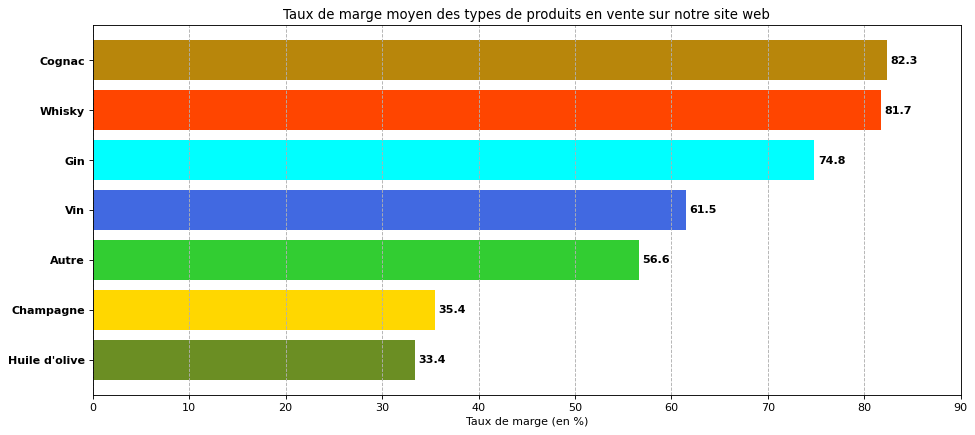

In [139]:
#création d'un dataframe avec le taux de marge moyen par type de produit
#Là encore, on n'affiche que les produits encore en vente sur le site web
df_avg = (df_data.loc[df_data["onsale_web"]==1]).groupby("product_type")["taux_marge %"].mean()
display(df_avg.sort_values(ascending=False))
#Affichage dans un graphique du taux de marge par type de produit
dfto_plot = (df_avg.sort_values(ascending=False)).reset_index()

df_color_data = (dfto_plot.merge(df_couleurs, how="inner", left_on="product_type", right_on="product_type"))

fig = plt.figure(figsize=(14,6), dpi=80)

p=plt.barh(dfto_plot.shape[0]-np.arange(dfto_plot.shape[0]),
           dfto_plot["taux_marge %"],
           tick_label=dfto_plot["product_type"],
           color=df_color_data["couleur"])
plt.bar_label(p, label_type='edge', fmt='%.1f', padding=3.0, fontweight='bold')

plt.grid(visible=True, axis='x', linestyle='--')
plt.xlabel('Taux de marge (en %)')
plt.xlim([0,90])
plt.yticks(fontweight='bold')
plt.ylim([0.3,7.7])

plt.title("Taux de marge moyen des types de produits en vente sur notre site web")
plt.savefig("Taux_marge_catalogue.png")

plt.show()

total_sales  buy_value  sell_value  taux_marge %
product_type                                                   
Cognac                  35    1452.97     2641.88          81.8
Whisky                  48    1332.46     2405.58          80.5
Gin                     14     240.24      420.00          74.8
Vin                   5442   63851.56   102864.07          61.1
Autre                    7      93.10      145.81          56.6
Champagne              169    7749.80    10773.78          39.0
Huile d'olive           22     308.96      414.79          34.3

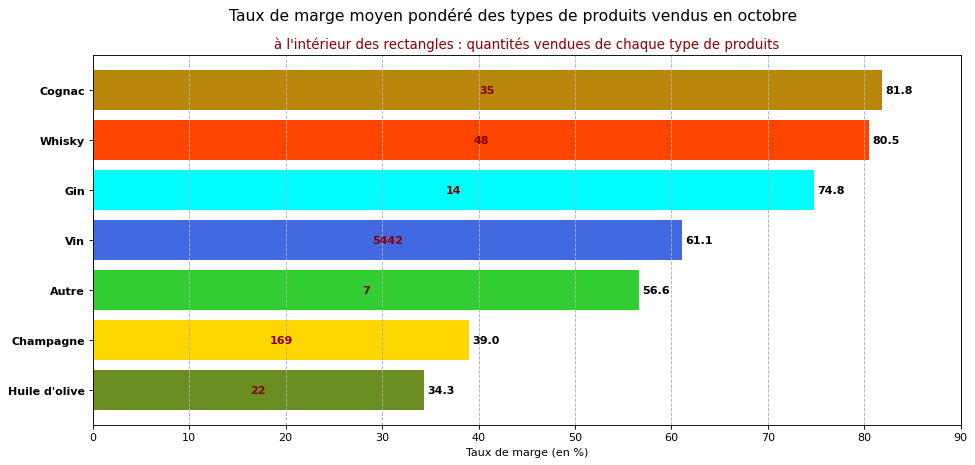

In [140]:
#Calcul des taux de marge moyens pondérés par catégorie, uniquement pour les produits vendus

#Création d'une colonne buy_value = total_sales * purchase_price
df_data["buy_value"] = df_data["total_sales"] * df_data["purchase_price"]
#Création d'une colonne sell_value = total_sales * prix_HT
df_data["sell_value"] = df_data["total_sales"] * df_data["prix_HT"]
# Agrégation par catégorie des colonnes buy_value et sell_value
# avec la fonction d'agrégation sum pour tenir compte des pondérations
df_avg = (df_data.loc[df_data["onsale_web"]==1]).groupby("product_type")[["total_sales","buy_value","sell_value"]].sum()
df_avg = df_avg.astype({"total_sales": int})
#display(df_avg.sort_values("total_sales",ascending=False))

# Calcul des taux de marge pondérés sur les données agrégées
df_avg["taux_marge %"] = df_avg["taux_marge %"] = round(100 * ((df_avg["sell_value"] / df_avg["buy_value"]) - 1),1)
display(df_avg.sort_values("taux_marge %",ascending=False))

#AFfichage graphique
#Affichage dans un graphique du taux de marge par type de produit
dfto_plot = (df_avg.sort_values("taux_marge %",ascending=False)).reset_index()

df_color_data = (dfto_plot.merge(df_couleurs, how="inner", left_on="product_type", right_on="product_type"))

fig = plt.figure(figsize=(14,6), dpi=80)

p=plt.barh(dfto_plot.shape[0]-np.arange(dfto_plot.shape[0]),
           dfto_plot["taux_marge %"],
           tick_label=dfto_plot["product_type"],
           color=df_color_data["couleur"])
plt.bar_label(p, label_type='edge', fmt='%.1f', padding=3.0, fontweight='bold')
#Pour afficher les quantités de produits vendus pour chaque type
plt.bar_label(p, labels=dfto_plot["total_sales"], label_type='center', fmt='%d', fontweight='bold', color="darkred")

plt.grid(visible=True, axis='x', linestyle='--')
plt.xlabel('Taux de marge (en %)')
plt.xlim([0,90])
plt.yticks(fontweight='bold')
plt.ylim([0.3,7.7])

plt.title("à l'intérieur des rectangles : quantités vendues de chaque type de produits", color="darkred")
plt.suptitle("Taux de marge moyen pondéré des types de produits vendus en octobre", fontsize=14)

plt.savefig("Taux_marge_ventes.png")

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

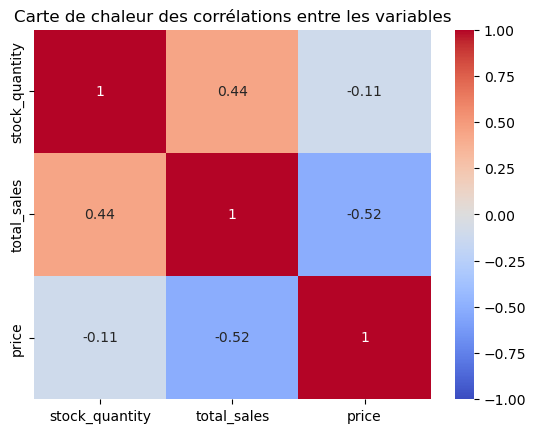

In [141]:
############################
# Analyse des correlations #
############################

#Création d'un heatmap de correlation avec les variables stock, sales et price
sb.heatmap((df_data.loc[df_data["onsale_web"]==1,["stock_quantity","total_sales","price"]]).corr(),
           vmin=-1,vmax=1,cmap='coolwarm',annot=True)
plt.title("Carte de chaleur des corrélations entre les variables")
plt.show()
#on peut également créer un mask pour n'afficher qu'une demi heatmap

**Que peut-on conclure des correlations ?**<br>

Les corrélations entre les 3 variables sont tout au plus modérées.<br>
- entre *total_sales* et *stock_quantity* : il est logique de penser que plus un produit est vendu (en quantité) plus les stocks nécessaires pour couvrir la demande vont être élevés ;<br>
- entre *price* et *stock_quantity* : corrélation faible, pas significative ;<br>
- entre *price* et *total_sales* : plus un produit est cher, moins il y aura de clients pour l'acheter, surtout pour des produits qui ne sont pas de première nécessité comme les vins et spiritueux.

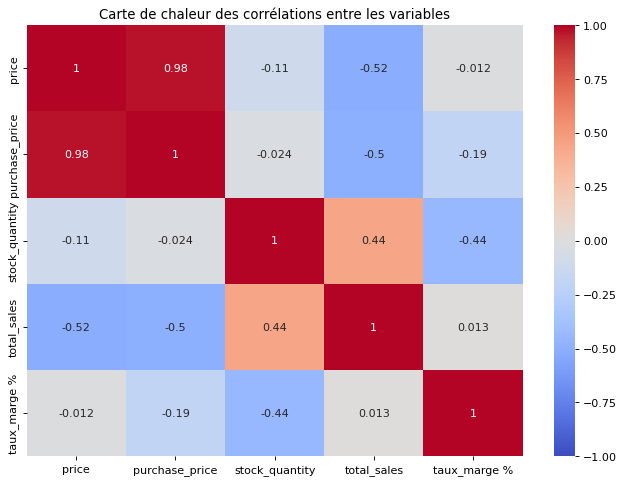

In [142]:
#Création d'un heatmap de correlation avec les variables stock, sales et price
fig = plt.figure(figsize=(10,7), dpi=80)

sb.heatmap((df_data.loc[df_data["onsale_web"]==1,["price","purchase_price","stock_quantity","total_sales","taux_marge %"]]).corr(),
           vmin=-1,vmax=1,cmap='coolwarm',annot=True)
plt.title("Carte de chaleur des corrélations entre les variables")
plt.savefig("Heatmap.png")
plt.show()
#on peut également créer un mask pour n'afficher qu'une demi heatmap

Équation de la droite de régression linéaire :
a * x + b avec :
a = 1.82
b = 1.63
Coefficient de détermination R2 = 0.952


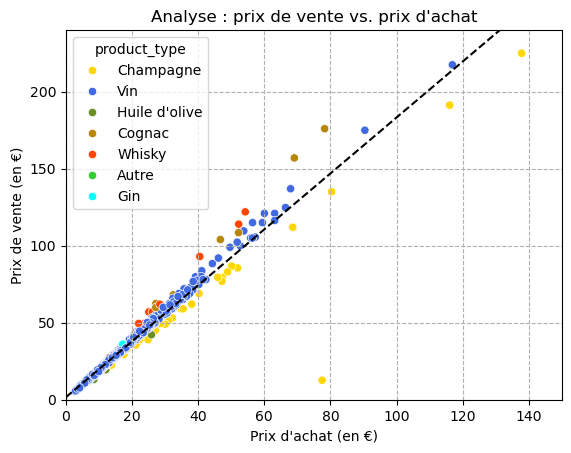

In [143]:
#Étude de la corrélation entre prix de vente et prix d'achat

df_color_data = (df_data.merge(df_couleurs, how="inner", left_on="product_type", right_on="product_type"))

Y=df_data['price']
X=df_data[['purchase_price']]
X=X.copy()
X['intercept']=1
reglin = sm.OLS(Y, X).fit()
a,b,R2 = reglin.params['purchase_price'],reglin.params['intercept'],reglin.rsquared
print("Équation de la droite de régression linéaire :\na * x + b avec :")
print("a =",round(a,2))
print("b =",round(b,2))
print("Coefficient de détermination R2 =",round(R2,3))

palette = df_color_data.set_index("product_type")["couleur"].to_dict()

sb.scatterplot(data=df_data,x='purchase_price',y='price',hue='product_type',palette=palette)
plt.plot(np.linspace(0.0,140.0,15),[a*x+b for x in np.linspace(0.0,140.0,15)], color='black', linestyle='dashed')
plt.title("Analyse : prix de vente vs. prix d'achat")
plt.xlim([0,150])
plt.ylim([0,240])
plt.grid(visible=True, axis='both', linestyle='--')

plt.xlabel("Prix d'achat (en €)")
plt.ylabel("Prix de vente (en €)")

plt.savefig("Correlation_prices.png")

plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [144]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_data.to_excel("data.xlsx",sheet_name="data")
df_erp.to_excel("data_erp.xlsx",sheet_name="ERP")